<div align="center">
    <h1><strong></strong></h1>
</div>


<div align="center">
    <h1><strong>Deloitte's Quantum Climate Challenge 2024 – Flood Prediction</strong></h1>
    <img src="https://images.prismic.io/ekipa/ZfAZYkmNsf2sHg-O_Original-Kopie.png?auto=format,compress" alt="ml_map" width="600"/>
    <p>Source: <a href="https://images.prismic.io/ekipa/ZfAZYkmNsf2sHg-O_Original-Kopie.png?auto=format,compress">https://images.prismic.io/ekipa/ZfAZYkmNsf2sHg-O_Original-Kopie.png?auto=format,compress</a></p>
</div>

<div align="center">
    <h1><strong></strong></h1>
</div>



# **Tasks**
Quantum machine learning models can be created using ***hybrid classical-quantum computation*** in a myriad of ways. To reduce the complexity of the challenge to a level that is manageable in the given time frame, we have simplified the problem.

It is highly encouraged to analyze the problem as a whole and deviate from these simplifications to further improve performance of the calculations and improve the fit of the calculated solution.

It is sufficient to solve the challenge using the simplifications. However, producing a solution to a higher complexity problem will raise the likelihood of achieving a good ranking.

**To successfully complete this challenge please complete the following tasks:**

# **Task 1**
B: Evaluate your solution, describing the advantages and disadvantages of your approach(es). Evaluate the performance differences between your solution and the classical approach. Use at least the following evaluation criteria:

*   Training time
*   Accuracy of all predictions for the year 2023, including:
*   I. In relation to a classification:
*   i. False-Positive
*   ii. True-Positive
*   iii. False-Negative
*   iv. True-Negative
*   II. In relation to a water level forecast:
*   i. Mean-Absolute-Error
*   ii. Mean-Squared-Error
*   Learning curve (for models using epoch training)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### ***Explanation of variables:***

*   ***phenomenon_time***: Date and time of the phenomenon measurement in river data (including start and end date of the measure).
*   ***result***: Measurement result, such as water level or discharge in river data.
*   ***Station***: Name of the monitoring station.
*   ***Latitude***: Latitude coordinate of the monitoring station.
*   ***Longitude***: Longitude coordinate of the monitoring station.
*   ***ID***: Unique identifier for the monitoring station.
*   ***Phenomenon***: Type of phenomenon being measured (e.g., water level, discharge, volume, fill-level).
*   ***Start***: Start date of the measurement period.
*   ***End***: End date of the measurement period.
*   ***File-name***: Name of the file containing the data.
*   ***STATIONS_ID***: Unique identifier for weather stations.
*   ***MESS_DATUM***: Date of measurement.
*   ***RS***: Accumulated precipitation data for each day.
*   ***RS1, RS2, RS3, RS7, RS14***: Forecasted precipitation data for 1, 2, 3, 7, and 14 days in the future.
*   ***RSF***: Form of precipitation (0: no precipitation, 4: unknown form of precipitation, 6: rain only, 7: snow only, 8: rain and snow, 9: missing or no identifiable form).
*   ***STATIONS_NAME***: Name of the weather station.
*   ***LATITUDE, LONGITUDE***: Geographic coordinates of the weather station.
*   ***is_flood***: Binary indicator of flood event (1 for flood, 0 otherwise) in river data.

***Number of datasets used:***

*   ***Two datasets***: River Data and Weather Data.



# **1. Loading, preprocessing data and checking basic information about datasets.**

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn import svm

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [3]:
# Define the path to the data folder
data_folder = 'drive/MyDrive/ZfDaU0mNsf2sHiLx_Data'

*Based on the information contained in the document entitled "Deloitte Quantum Climate Challenge 2024 - Data description", the location "Kluserbrücke" was selected as the target of the QML-Model for further considerations. We download data from the file "river-meta-data.csv" regarding the water level in this location.*

In [4]:
# List of file names
file_name = 'River_Data/2024_02_23__SKLU__WST__2024-02-27.csv'

In [5]:
# Read the CSV file
river_data = pd.read_csv(os.path.join(data_folder, file_name))

# Print the shape of the loaded DataFrame
print("Shape of the DataFrame:", river_data.shape)

Shape of the DataFrame: (1452046, 2)


In [6]:
# Display the first few rows of the DataFrame to ensure data is loaded correctly
print(river_data.head())

        phenomenon time  result
0  1934-10-26T23:00:00Z     NaN
1  1934-10-27T06:37:30Z     NaN
2  1934-10-27T14:15:00Z    32.2
3  1934-10-27T14:45:00Z    30.4
4  1934-10-27T15:00:00Z    29.6


In [7]:
# Print basic information about the river data
print(river_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452046 entries, 0 to 1452045
Data columns (total 2 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   phenomenon time  1452046 non-null  object 
 1   result           1452012 non-null  float64
dtypes: float64(1), object(1)
memory usage: 22.2+ MB
None


In [8]:
# Clean column names
river_data.columns = river_data.columns.str.strip()

In [9]:
# Preprocessing River Data for dataset
river_data['phenomenon_time'] = pd.to_datetime(river_data['phenomenon time']).dt.tz_localize(None)
river_data.drop(columns=['phenomenon time'], inplace=True)

# Print the preprocessed data
print("\nPreprocessed data for River Data:")
print(river_data.head())


Preprocessed data for River Data:
   result     phenomenon_time
0     NaN 1934-10-26 23:00:00
1     NaN 1934-10-27 06:37:30
2    32.2 1934-10-27 14:15:00
3    30.4 1934-10-27 14:45:00
4    29.6 1934-10-27 15:00:00


In [10]:
# Compute and print summary statistics for each dataset
print("\nSummary statistics for River Data:")
print(river_data.describe())


Summary statistics for River Data:
             result                phenomenon_time
count  1.452012e+06                        1452046
mean   3.694178e+01  1998-10-16 16:02:46.186078080
min   -1.600000e+00            1934-10-26 23:00:00
25%    2.060000e+01            1995-09-07 00:48:15
50%    2.600000e+01            2008-09-08 12:52:30
75%    4.200000e+01            2020-01-03 11:19:30
max    3.758000e+02            2024-02-22 22:55:00
std    2.699592e+01                            NaN


In [11]:
# Check for missing values in River Data dataset
print("\nMissing Values in River Data:")
print(river_data.isnull().sum())


Missing Values in River Data:
result             34
phenomenon_time     0
dtype: int64


In [12]:
# Checking for negative values in River Data 'result' column
negative_values_count = (river_data['result'] < 0).sum()

# Print the count of negative values
print("\nCount of negative values in River Data 'result' column:", negative_values_count)

# Print the rows with negative values
if negative_values_count > 0:
    print("\nNegative values in River Data:")
    print(river_data[river_data['result'] < 0].head())
else:
    print("\nNo negative values in River Data.")


Count of negative values in River Data 'result' column: 50

Negative values in River Data:
       result     phenomenon_time
42127    -0.3 1936-03-20 02:30:00
42128    -0.3 1936-03-20 02:45:00
42345    -0.8 1936-03-22 22:30:00
42346    -1.2 1936-03-22 22:45:00
42347    -1.5 1936-03-22 23:00:00


In [13]:
river_data.iloc[220320:220330]

,result,phenomenon_time
220320,114.6,1941-12-12 22:40:00
220321,114.0,1941-12-12 22:45:00
220322,112.5,1941-12-12 22:50:00
220323,111.5,1941-12-12 22:55:00
220324,NaN,1941-12-12 23:00:00
220325,NaN,1946-10-25 23:00:00
220326,16.0,1951-09-07 23:00:00
220327,16.0,1951-09-07 23:58:00
220328,18.0,1951-09-08 00:27:00
220329,17.0,1951-09-08 02:09:00


*We can notice in the river data that there is a lack of data for the period from 1941-12-12 to 1951-09-07, given that we do not need this data. I delete them.*

In [14]:
# Assuming 'phenomenon_time' is the datetime column
river_data['phenomenon_time'] = pd.to_datetime(river_data['phenomenon_time'])

# Define the end date to be removed
end_date = pd.to_datetime('1951-09-07')

# Filter out rows before the specified end date
river_data = river_data[river_data['phenomenon_time'] > end_date]

# Print the first few rows of the updated dataset
print(river_data.head())

        result     phenomenon_time
220326    16.0 1951-09-07 23:00:00
220327    16.0 1951-09-07 23:58:00
220328    18.0 1951-09-08 00:27:00
220329    17.0 1951-09-08 02:09:00
220330    15.0 1951-09-08 03:21:00


In [15]:
# Filter out rows with negative values
river_data = river_data[river_data['result'] >= 0]

# Interpolate missing values
river_data['result'] = river_data['result'].interpolate()

# Print the first few rows of the updated dataset
print(river_data.head())

        result     phenomenon_time
220326    16.0 1951-09-07 23:00:00
220327    16.0 1951-09-07 23:58:00
220328    18.0 1951-09-08 00:27:00
220329    17.0 1951-09-08 02:09:00
220330    15.0 1951-09-08 03:21:00


<ipython-input-15-e8aee3ba7010>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  river_data['result'] = river_data['result'].interpolate()


In [16]:
# Check for missing values in River Data dataset
print("\nMissing Values in River Data:")
print(river_data.isnull().sum())


Missing Values in River Data:
result             0
phenomenon_time    0
dtype: int64


In [17]:
# Check for negative values using boolean indexing
negative_values = river_data[river_data['result'] < 0]

# Print the count of negative values
print("\nNegative values in River Data:")
print(negative_values)


Negative values in River Data:
Empty DataFrame
Columns: [result, phenomenon_time]
Index: []


In [18]:
# Print the last few rows of the updated dataset
print(river_data.tail())

         result     phenomenon_time
1452041    92.2 2024-02-22 22:35:00
1452042    92.0 2024-02-22 22:40:00
1452043    91.9 2024-02-22 22:45:00
1452044    92.2 2024-02-22 22:50:00
1452045    91.9 2024-02-22 22:55:00


In [19]:
# Read Weather Data
weather_data = pd.read_csv('drive/MyDrive/ZfDaU0mNsf2sHiLx_Data/weather_data.csv')

print("\nShape of Weather Data:")
print(weather_data.shape)


Shape of Weather Data:
(36553, 12)


In [20]:
# Cleaning column names by removing leading and trailing spaces
weather_data.columns = weather_data.columns.str.strip()

print("\nCleaned Weather Data Columns:")
print(weather_data.columns)


Cleaned Weather Data Columns:
Index(['STATIONS_ID', 'MESS_DATUM', 'RS', 'RS1', 'RS2', 'RS3', 'RS7', 'RS14',
       'RSF', 'STATIONS_NAME', 'LATITUDE', 'LONGITUDE'],
      dtype='object')


In [21]:
# Filter data for the weather station "Wuppertal-Buchenhofen"
weather_data_wuppertal = weather_data[weather_data['STATIONS_NAME'] == 'Wuppertal-Buchenhofen']

# Display the first few rows of the filtered data
print(weather_data_wuppertal.head())

       STATIONS_ID  MESS_DATUM   RS       RS1       RS2       RS3       RS7  \
24135         5717  1990-01-01  0.1  0.102790  0.081214  0.000000  0.453204   
24136         5717  1990-01-02  0.2  0.000000  0.000000  0.100044  1.632618   
24137         5717  1990-01-03  0.0  0.000000  0.094785  0.079725  0.000000   
24138         5717  1990-01-04  0.0  0.082889  0.044273  0.000000  0.000000   
24139         5717  1990-01-05  0.1  0.067181  0.000000  1.267585  1.364963   

           RS14  RSF          STATIONS_NAME   LATITUDE  LONGITUDE  
24135  6.117234    6  Wuppertal-Buchenhofen  51.225598   7.105176  
24136  2.700000    6  Wuppertal-Buchenhofen  51.225598   7.105176  
24137  2.474654    0  Wuppertal-Buchenhofen  51.225598   7.105176  
24138  0.000000    6  Wuppertal-Buchenhofen  51.225598   7.105176  
24139  7.250757    6  Wuppertal-Buchenhofen  51.225598   7.105176  


In [22]:
weather_data_wuppertal['STATIONS_NAME'].value_counts()

STATIONS_NAME
Wuppertal-Buchenhofen    12418
Name: count, dtype: int64

In [23]:
# Display basic information about weather data
print("\nWeather Data Info:")
print(weather_data_wuppertal.info())


Weather Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 12418 entries, 24135 to 36552
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   STATIONS_ID    12418 non-null  int64  
 1   MESS_DATUM     12418 non-null  object 
 2   RS             12418 non-null  float64
 3   RS1            12418 non-null  float64
 4   RS2            12418 non-null  float64
 5   RS3            12418 non-null  float64
 6   RS7            12418 non-null  float64
 7   RS14           12418 non-null  float64
 8   RSF            12418 non-null  int64  
 9   STATIONS_NAME  12418 non-null  object 
 10  LATITUDE       12418 non-null  float64
 11  LONGITUDE      12418 non-null  float64
dtypes: float64(8), int64(2), object(2)
memory usage: 1.2+ MB
None


In [24]:
print("\nWeather Data:")
print(weather_data_wuppertal.head())


Weather Data:
       STATIONS_ID  MESS_DATUM   RS       RS1       RS2       RS3       RS7  \
24135         5717  1990-01-01  0.1  0.102790  0.081214  0.000000  0.453204   
24136         5717  1990-01-02  0.2  0.000000  0.000000  0.100044  1.632618   
24137         5717  1990-01-03  0.0  0.000000  0.094785  0.079725  0.000000   
24138         5717  1990-01-04  0.0  0.082889  0.044273  0.000000  0.000000   
24139         5717  1990-01-05  0.1  0.067181  0.000000  1.267585  1.364963   

           RS14  RSF          STATIONS_NAME   LATITUDE  LONGITUDE  
24135  6.117234    6  Wuppertal-Buchenhofen  51.225598   7.105176  
24136  2.700000    6  Wuppertal-Buchenhofen  51.225598   7.105176  
24137  2.474654    0  Wuppertal-Buchenhofen  51.225598   7.105176  
24138  0.000000    6  Wuppertal-Buchenhofen  51.225598   7.105176  
24139  7.250757    6  Wuppertal-Buchenhofen  51.225598   7.105176  


In [25]:
# Locate and display cells with the value -999 in weather data
weather_data_minus_999_indices = (weather_data_wuppertal == -999).any(axis=1)
weather_data_minus_999 = weather_data_wuppertal.loc[weather_data_minus_999_indices, :]
print(weather_data_minus_999)

       STATIONS_ID  MESS_DATUM     RS        RS1       RS2       RS3  \
36394         5717  2023-07-26 -999.0   0.000000  0.000000  0.000000   
36395         5717  2023-07-27 -999.0  70.460238  3.031543  4.938584   

             RS7       RS14  RSF          STATIONS_NAME   LATITUDE  LONGITUDE  
36394  13.684011   2.933216 -999  Wuppertal-Buchenhofen  51.225598   7.105176  
36395  11.163867  13.619473 -999  Wuppertal-Buchenhofen  51.225598   7.105176  


In [26]:
# Handle outliers and inconsistencies in weather data
weather_data_wuppertal.replace(-999, np.nan, inplace=True)  # Replaced -999 with NaNs

<ipython-input-26-13e2f818f865>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_wuppertal.replace(-999, np.nan, inplace=True)  # Replaced -999 with NaNs


In [27]:
# Fill missing values in 'RS' and 'RSF' columns with mean
weather_data_wuppertal['RS'].fillna(weather_data_wuppertal['RS'].mean(), inplace=True)
weather_data_wuppertal['RSF'].fillna(weather_data_wuppertal['RSF'].mean(), inplace=True)

<ipython-input-27-1e074b008afb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_wuppertal['RS'].fillna(weather_data_wuppertal['RS'].mean(), inplace=True)
<ipython-input-27-1e074b008afb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_wuppertal['RSF'].fillna(weather_data_wuppertal['RSF'].mean(), inplace=True)


In [28]:
# Preprocess weather data by converting column data types to compatible formats.
weather_data_wuppertal['MESS_DATUM'] = pd.to_datetime(weather_data_wuppertal['MESS_DATUM'])

<ipython-input-28-a34466c8576f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_wuppertal['MESS_DATUM'] = pd.to_datetime(weather_data_wuppertal['MESS_DATUM'])


In [29]:
# Summary statistics for Weather Data
print("\nWeather Data Summary Statistics:")
print(weather_data_wuppertal.describe())


Weather Data Summary Statistics:
       STATIONS_ID           MESS_DATUM            RS           RS1  \
count      12418.0                12418  12418.000000  12418.000000   
mean        5717.0  2006-12-31 12:00:00      3.096714      3.158663   
min         5717.0  1990-01-01 00:00:00      0.000000      0.000000   
25%         5717.0  1998-07-02 06:00:00      0.000000      0.000000   
50%         5717.0  2006-12-31 12:00:00      0.200000      0.580451   
75%         5717.0  2015-07-01 18:00:00      3.800000      4.086669   
max         5717.0  2023-12-31 00:00:00     90.800000     73.080326   
std            0.0                  NaN      5.870517      5.653251   

                RS2           RS3           RS7          RS14           RSF  \
count  12418.000000  12418.000000  12418.000000  12418.000000  12418.000000   
mean       3.142220      3.284563      3.232526      3.226051      3.116704   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       

In [30]:
# Check for missing values in Weather Data
print("\nMissing Values in Weather Data:")
print(weather_data_wuppertal.isnull().sum())


Missing Values in Weather Data:
STATIONS_ID      0
MESS_DATUM       0
RS               0
RS1              0
RS2              0
RS3              0
RS7              0
RS14             0
RSF              0
STATIONS_NAME    0
LATITUDE         0
LONGITUDE        0
dtype: int64


In [31]:
print("\nShape of Weather Data:")
print(weather_data_wuppertal.shape)


Shape of Weather Data:
(12418, 12)


# **Exploratory Data Analysis (EDA) for River Data and Weather Data**

**Distribution of Flood Events (target variable 'is_flood'):**

*   The flood warning **classification model** has been optimized by lowering the flood **threshold** to 90 cm, which increases its sensitivity.

In [32]:
# Define target variable as 'is_flood' (1 for flood, 0 otherwise) and create column in river data based on threshold.
river_data['is_flood'] = (river_data['result'] > 90).astype(int)

In [33]:
print(river_data.head())

        result     phenomenon_time  is_flood
220326    16.0 1951-09-07 23:00:00         0
220327    16.0 1951-09-07 23:58:00         0
220328    18.0 1951-09-08 00:27:00         0
220329    17.0 1951-09-08 02:09:00         0
220330    15.0 1951-09-08 03:21:00         0


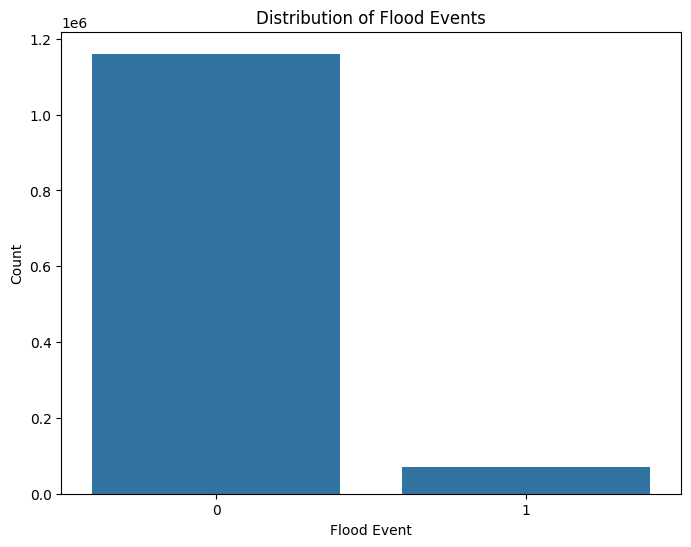

Statistics for Distribution of Flood Events:
Number of Flood Events: 71239
Number of Non-Flood Events: 1160471
Percentage of Flood Events: 5.78%
Percentage of Non-Flood Events: 94.22%


In [ ]:
# Visualize distribution of target variable 'is_flood' using river_data
plt.figure(figsize=(8, 6))
sns.countplot(x='is_flood', data=river_data)
plt.title('Distribution of Flood Events')
plt.xlabel('Flood Event')
plt.ylabel('Count')
plt.show()

# Calculate count of flood and non-flood events
flood_count = river_data['is_flood'].sum()
non_flood_count = len(river_data) - flood_count

# Print statistics
print("Statistics for Distribution of Flood Events:")
print("Number of Flood Events:", flood_count)
print("Number of Non-Flood Events:", non_flood_count)
print("Percentage of Flood Events: {:.2f}%".format((flood_count / len(river_data)) * 100))
print("Percentage of Non-Flood Events: {:.2f}%".format((non_flood_count / len(river_data)) * 100))

*   *The graph illustrates the distribution of flood events based on the threshold set in the task (90 cm).*
*   *The dataset recorded 71,239 floods and 1,160,471 non-flood events. This means that flood events constitute approximately 5.78% of all observed events.*
*   *In turn, non-flood events constitute the majority and constitute approximately 94.22% of all events.*
*   *This distribution highlights that flood events are relatively less frequent compared to non-flood events, with the majority of recorded events representing normal water level conditions.*

***Time Series of River Data:***

Average Water Level: 36.86403645582159 cm
High Value Threshold: 375.8 cm


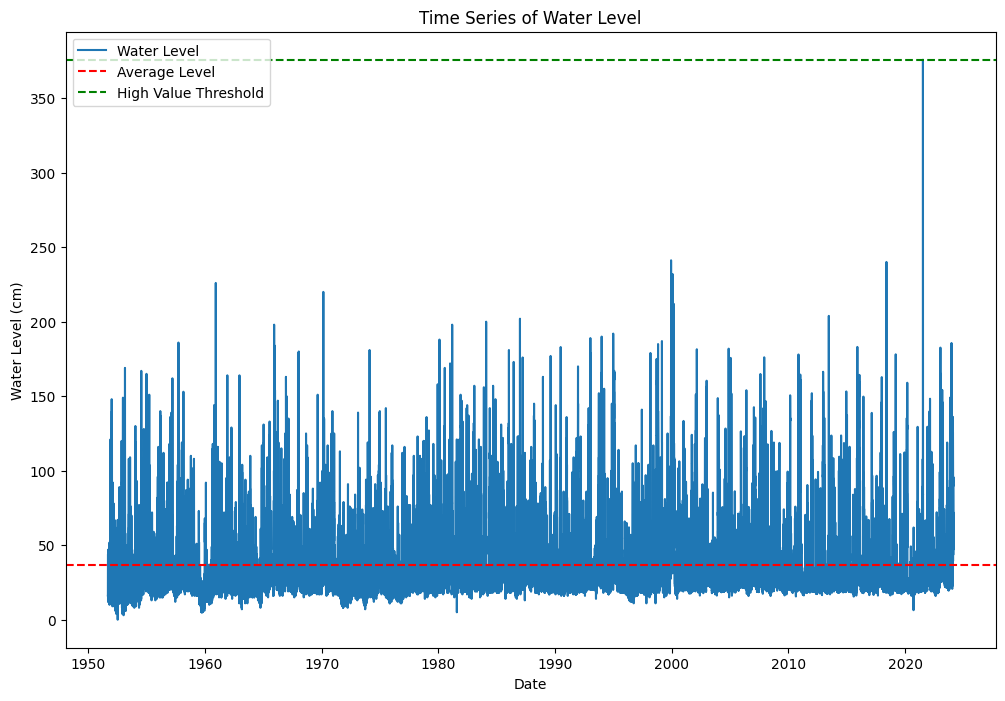

In [ ]:
# Calculate the average water level from the river data
average_water_level = river_data['result'].mean()

# Identify the high-value threshold from the river data
high_value_threshold = river_data['result'].max()

# Print the calculated values
print("Average Water Level:", average_water_level, "cm")
print("High Value Threshold:", high_value_threshold, "cm")

# Visualize the time series of River Data
plt.figure(figsize=(12, 8))
plt.plot(river_data['phenomenon_time'], river_data['result'], label='Water Level')
plt.xlabel('Date')
plt.ylabel('Water Level (cm)')
plt.title('Time Series of Water Level')
plt.axhline(y=average_water_level, color='r', linestyle='--', label='Average Level')
plt.axhline(y=high_value_threshold, color='g', linestyle='--', label='High Value Threshold')
plt.legend()
plt.show()

*   *This chart illustrates the fluctuation in water levels over time. The average water level is approximately ~37 cm, and there are instances where the level exceeds the high value threshold of ~376 cm, indicating rapid changes in water levels.*

***Seasonal Patterns in River Data:***



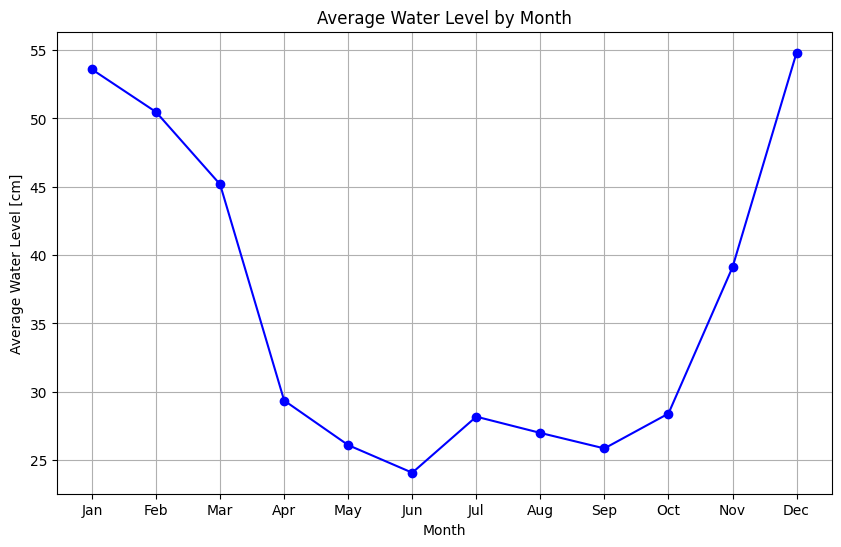

In [ ]:
# Extract month from phenomenon_time
river_data['month'] = river_data['phenomenon_time'].dt.month

# Aggregate by month and calculate average water level
monthly_avg_water_level = river_data.groupby('month')['result'].mean()

# Plotting
plt.figure(figsize=(10, 6))
monthly_avg_water_level.plot(marker='o', color='blue')
plt.title('Average Water Level by Month')
plt.xlabel('Month')
plt.ylabel('Average Water Level [cm]')
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

*The chart illustrates distinct seasonal patterns in river water level data:*

1.   *Winter Months (December-January-February):*
  *   *During the winter months, water levels are notably higher, peaking in December at approximately 55 cm.*
  *   *January also exhibits relatively high average water levels, approximately 53.5 cm.*
2.   *Spring Months (March-April-May):*
  *   *With the onset of spring, water levels start to decline, decreasing by about 35% compared to the winter period.*
  *   *April shows a slight uptick in water levels, averaging around 29 cm, signaling the beginning of the decline.*
3.   *Summer Months (June-July-August):*
  *   *Water levels remain relatively stable throughout the summer, with fluctuations not exceeding 28 cm.*
  *   *June records the lowest average water level among summer months, around 24 cm, possibly due to reduced rainfall.*
4.   *Autumn Months (September-October-November):*
  *   *Water levels begin to rise again in autumn, peaking in September at approximately 26 cm.*
  *   *October sees a gradual increase in water levels, averaging around 28 cm, while November marks a significant rise of approximately 29% compared to October, reaching about 39 cm.*

*The seasonal fluctuations in river data demonstrate cyclical variations in water levels across the year, with peaks in winter and autumn, declines in spring, and stability in summer.*

***Time Series of Weather Data:***

Statistics of Precipitation (RS) Time Series:
Mean Precipitation Rate: 3.10 mm/day
Maximum Precipitation in a Day: 90.80 mm


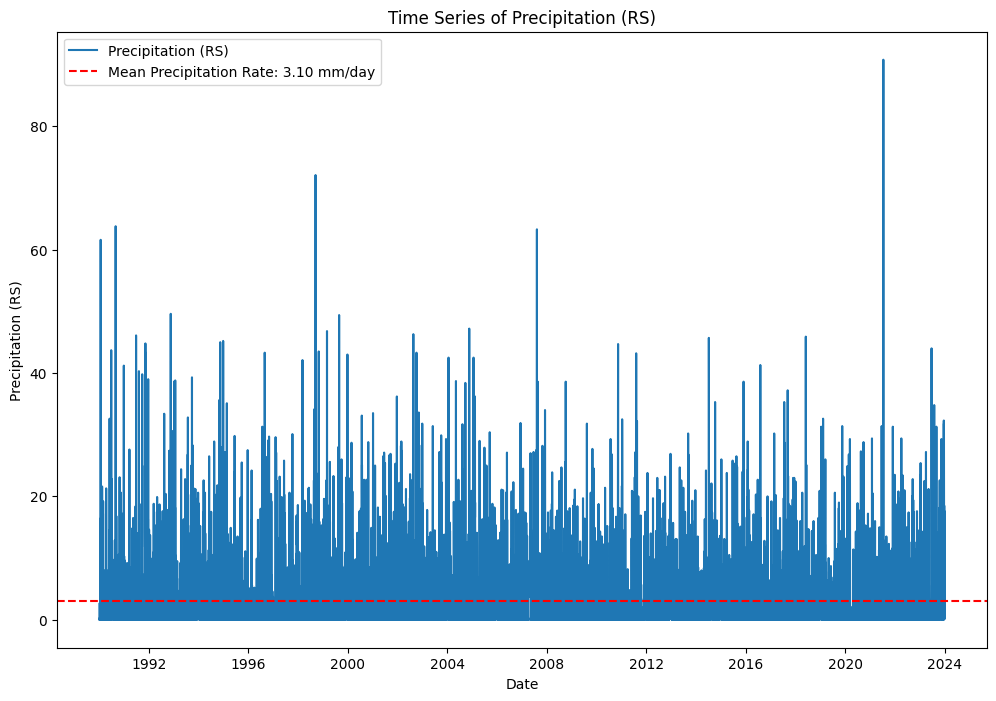

In [ ]:
# Calculate statistics
mean_precipitation_rate = weather_data_wuppertal['RS'].mean()
max_precipitation_in_a_day = weather_data_wuppertal['RS'].max()

# Print statistics
print("Statistics of Precipitation (RS) Time Series:")
print("Mean Precipitation Rate: {:.2f} mm/day".format(mean_precipitation_rate))
print("Maximum Precipitation in a Day: {:.2f} mm".format(max_precipitation_in_a_day))

# Plot the time series of precipitation (RS) from weather data
plt.figure(figsize=(12, 8))
plt.plot(weather_data_wuppertal['MESS_DATUM'], weather_data_wuppertal['RS'], label='Precipitation (RS)')
plt.xlabel('Date')
plt.ylabel('Precipitation (RS)')
plt.title('Time Series of Precipitation (RS)')
plt.axhline(y=mean_precipitation_rate, color='r', linestyle='--', label=f'Mean Precipitation Rate: {mean_precipitation_rate:.2f} mm/day')
plt.legend()
plt.show()

*   *The time series plot of precipitation (RS) data illustrates the variation in precipitation levels over time.*
*   *The average rate of precipitation over the entire time series is 3.10 mm/day. This value provides insight into the typical daily precipitation level experienced in the region.*
*   *The highest precipitation recorded in a single day is 90.80 mm. This peak value indicates instances of intense rainfall events that occurred during the observed period.*
*   *The time series plot provides a visual representation of the fluctuations in precipitation levels over time, highlighting both the variability and intensity of rainfall events experienced in the region.*

***Seasonal Patterns in Weather Data:***

<ipython-input-39-a213194ec4e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_wuppertal['year'] = weather_data_wuppertal['MESS_DATUM'].dt.year


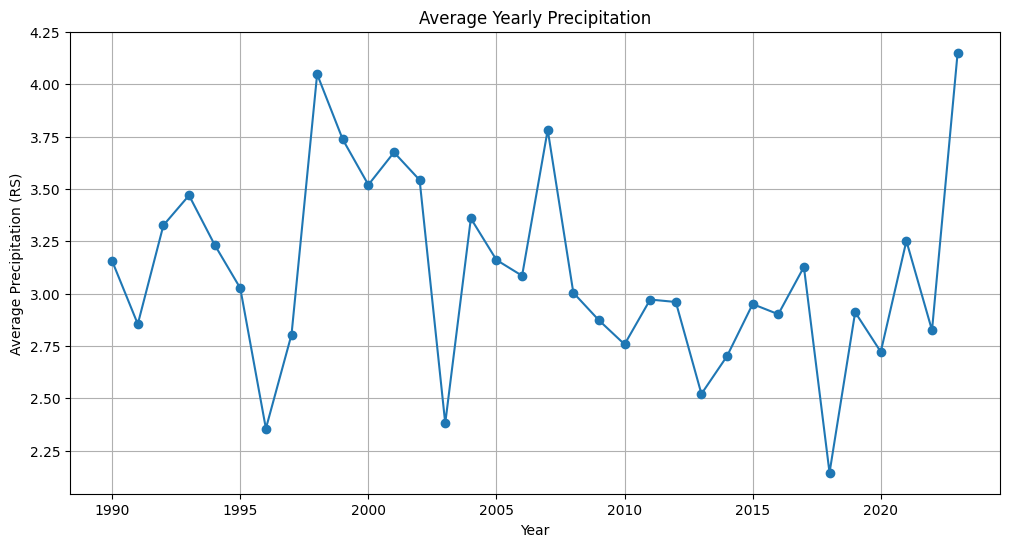

Statistics for Average Yearly Precipitation:
Mean: 3.10
Maximum: 4.15
Minimum: 2.14


In [ ]:
# Group weather_data by year and calculate average precipitation
weather_data_wuppertal['year'] = weather_data_wuppertal['MESS_DATUM'].dt.year
yearly_precipitation = weather_data_wuppertal.groupby('year')['RS'].mean()

# Plot time series of average yearly precipitation
plt.figure(figsize=(12, 6))
yearly_precipitation.plot(marker='o')
plt.title('Average Yearly Precipitation')
plt.xlabel('Year')
plt.ylabel('Average Precipitation (RS)')
plt.grid(True)
plt.show()

# Calculate statistics
mean_precipitation = yearly_precipitation.mean()
max_precipitation = yearly_precipitation.max()
min_precipitation = yearly_precipitation.min()

# Print statistics
print("Statistics for Average Yearly Precipitation:")
print("Mean: {:.2f}".format(mean_precipitation))
print("Maximum: {:.2f}".format(max_precipitation))
print("Minimum: {:.2f}".format(min_precipitation))

*   *The graph illustrates the average annual rainfall over the specified period from 1990 to 2023. Up until 2008, there was considerable variability in rainfall compared to the years from 2008 to 2022. The reduced rainfall during the years 2008 to 2022 could possibly be attributed to the effects of global warming. However, post-2022, there's a notable increase in rainfall compared to the preceding period.*
*   *The average annual rainfall over the observed timeframe stands at approximately 3.10 units, reflecting the typical precipitation received annually in the "Wupper-Talsperre" region. There's observable variability in annual precipitation values from 1990 to 2023, with a lesser degree of variability noted between 2008 and 2022, likely influenced by global warming.*

*   *The maximum annual rainfall recorded during this period is approximately 4.15 units, representing the highest amount of rainfall occurring in a single year. This could indicate a year characterized by particularly heavy rainfall, significant weather events, or external factors such as economic impacts such as COVID-19.*
*   *Conversely, the observed minimum annual rainfall is approximately 2.14 units, marking the lowest amount of precipitation recorded in a single year. This may indicate a year with relatively dry conditions or minimal rainfall compared to other years, potentially influenced by factors like global warming.*

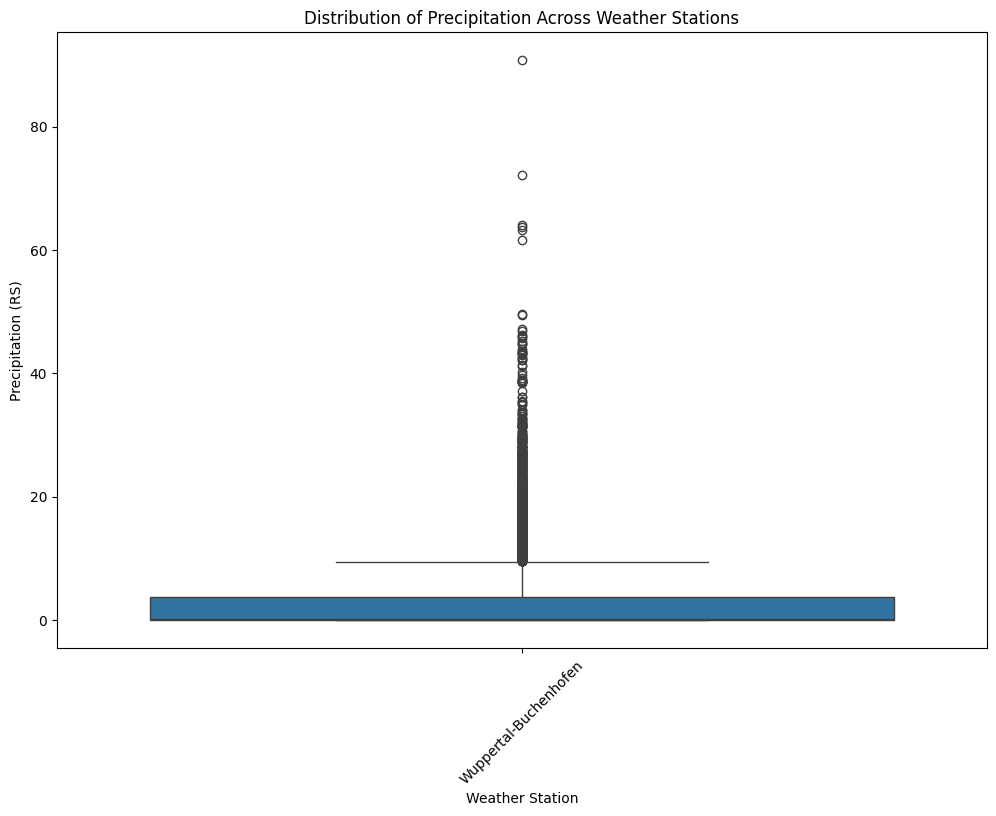

Precipitation Statistics:
Mean: 3.096713917525773 cm
Median: 0.2 cm
Minimum: 0.0 cm
Maximum: 90.8 cm
Upper Quartile (Q3): 3.8 cm


In [ ]:
# Boxplot of precipitation (RS) across stations
plt.figure(figsize=(12, 8))
sns.boxplot(x='STATIONS_NAME', y='RS', data=weather_data_wuppertal)
plt.title('Distribution of Precipitation Across Weather Stations')
plt.xlabel('Weather Station')
plt.ylabel('Precipitation (RS)')
plt.xticks(rotation=45)
plt.show()

# Calculate statistics for precipitation (RS)
precipitation_mean = weather_data_wuppertal['RS'].mean()
precipitation_median = weather_data_wuppertal['RS'].median()
precipitation_min = weather_data_wuppertal['RS'].min()
precipitation_max = weather_data_wuppertal['RS'].max()
# Calculate the upper quartile (Q3)
precipitation_q3 = weather_data_wuppertal['RS'].quantile(0.75)

# Print precipitation statistics
print("Precipitation Statistics:")
print("Mean:", precipitation_mean, "cm")
print("Median:", precipitation_median, "cm")
print("Minimum:", precipitation_min, "cm")
print("Maximum:", precipitation_max, "cm")
# Print the upper quartile (Q3)
print("Upper Quartile (Q3):", precipitation_q3, "cm")

*   *The graph depicted illustrates the distribution of rainfall (RS) across various weather stations. Focusing on the weather station "Wuppertal-Buchenhofen," the average rainfall is approximately 3.1 cm, while the median stands at 0.2 cm. This indicates a significant proportion of observations showing low levels of rainfall at this specific location. Notably, instances of no rainfall have been recorded, as indicated by the minimum recorded rainfall of 0.0 cm. Conversely, the maximum recorded rainfall of 90.8 cm suggests the potential for heavy rainfall at this weather station. These statistics suggest a moderate average rainfall but highlight considerable variability in rainfall levels, even within the same region.*
*   *Additionally, it's noted that 75% of the rainfall data fall below the upper quartile (Q3) of 3.8 cm. This implies that a quarter of the data lies between 3.8 cm and the maximum recorded rainfall, suggesting the presence of outliers with values ranging from 9 to 90.8 cm. The median and mean, approximately at 0.2 cm and 3.1 cm respectively, further indicate the distribution's central tendency.*

In [ ]:
# Quality check after preprocessing
print("\nRiver Data Info After Preprocessing:")
print(river_data.info())


River Data Info After Preprocessing:
<class 'pandas.core.frame.DataFrame'>
Index: 1231710 entries, 220326 to 1452045
Data columns (total 4 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   result           1231710 non-null  float64       
 1   phenomenon_time  1231710 non-null  datetime64[ns]
 2   is_flood         1231710 non-null  int64         
 3   month            1231710 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1)
memory usage: 42.3 MB
None


In [ ]:
print(weather_data_wuppertal.info())

<class 'pandas.core.frame.DataFrame'>
Index: 12418 entries, 24135 to 36552
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   STATIONS_ID    12418 non-null  int64         
 1   MESS_DATUM     12418 non-null  datetime64[ns]
 2   RS             12418 non-null  float64       
 3   RS1            12418 non-null  float64       
 4   RS2            12418 non-null  float64       
 5   RS3            12418 non-null  float64       
 6   RS7            12418 non-null  float64       
 7   RS14           12418 non-null  float64       
 8   RSF            12418 non-null  float64       
 9   STATIONS_NAME  12418 non-null  object        
 10  LATITUDE       12418 non-null  float64       
 11  LONGITUDE      12418 non-null  float64       
 12  year           12418 non-null  int32         
dtypes: datetime64[ns](1), float64(9), int32(1), int64(1), object(1)
memory usage: 1.3+ MB
None


***Outlier Detection in River Data:***

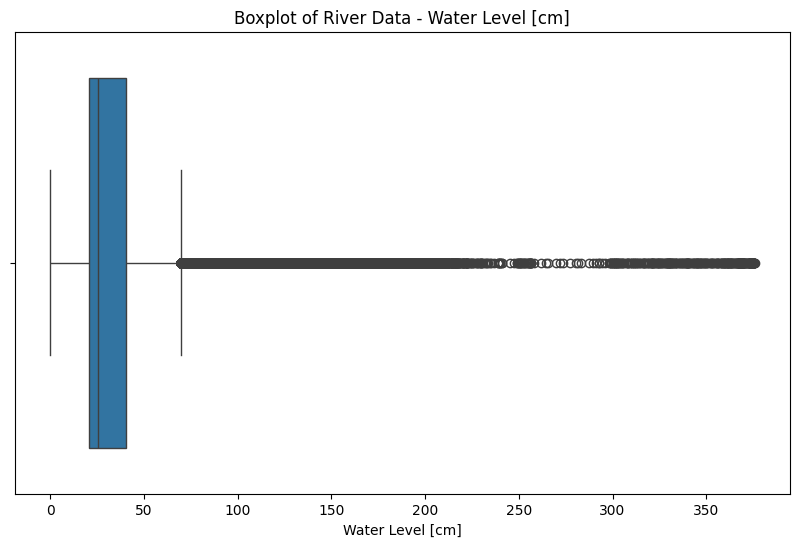

Statistics for Boxplot of River Data - Water Level:
Median Water Level: 25.4
First Quartile (Q1): 20.7
Third Quartile (Q3): 40.4
Interquartile Range (IQR): 19.7
Number of Outliers: 136432


In [ ]:
# Further visualization for outlier detection in river data
plt.figure(figsize=(10, 6))
sns.boxplot(x=river_data['result'])
plt.title('Boxplot of River Data - Water Level [cm]')
plt.xlabel('Water Level [cm]')
plt.show()

# Calculate key statistics
median_water_level = river_data['result'].median()
first_quartile = river_data['result'].quantile(0.25)
third_quartile = river_data['result'].quantile(0.75)
interquartile_range = third_quartile - first_quartile

# Identify outliers
lower_bound = first_quartile - 1.5 * interquartile_range
upper_bound = third_quartile + 1.5 * interquartile_range
outliers_count = len(river_data[(river_data['result'] < lower_bound) | (river_data['result'] > upper_bound)])

# Print statistics
print("Statistics for Boxplot of River Data - Water Level:")
print("Median Water Level:", median_water_level)
print("First Quartile (Q1):", first_quartile)
print("Third Quartile (Q3):", third_quartile)
print("Interquartile Range (IQR):", interquartile_range)
print("Number of Outliers:", outliers_count)

*   *The graph shows the distribution of water levels in rivers. The median water level, or the middle value in the dataset, is approximately 25.4 cm. This means that half of the observations are above this value and the other half are below this value.*
*   *The first quartile (Q1) is approximately 20.7 cm, implying that 25% of the data falls below this value, while the third quartile (Q3) is approximately 40.4 cm, implying that 75% of the data falls below this value.*
*   *The interquartile range (IQR), calculated as the difference between the third and first quartiles (Q3 - Q1), is approximately 19.7 cm. IQR is a measure of variability in the middle 50% of the data, allowing you to see how widely observations are distributed within this range.*
*   *Additionally, the graph shows the presence of outliers - a total of 136,432 cases were detected. These outliers are data points that deviate significantly from the range represented by the whiskers in the box plot, indicating the occurrence of extreme values relative to the rest of the data set.*


***Distribution of River Data:***



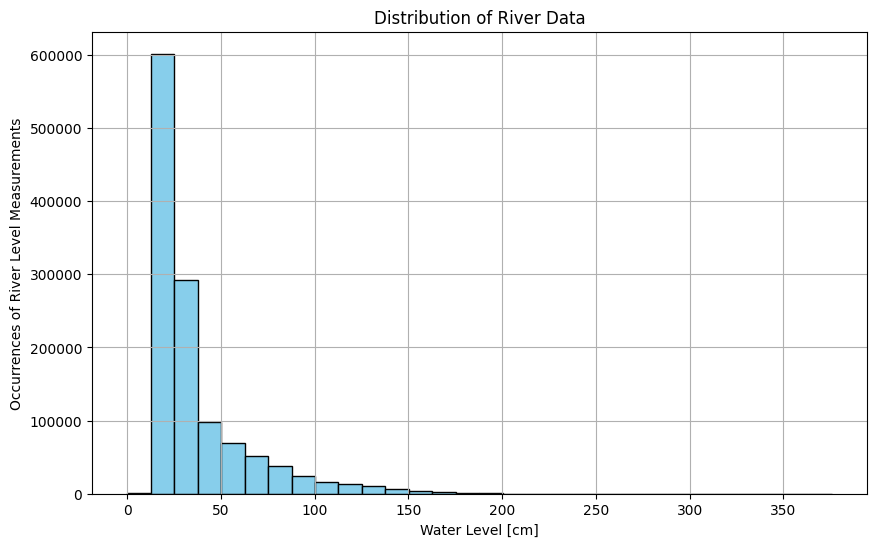

Mean Result: 36.86403645582159
Maximum Result: 375.8


In [ ]:
# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(river_data['result'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of River Data')
plt.xlabel('Water Level [cm]')
plt.ylabel('Occurrences of River Level Measurements')
plt.grid(True)
plt.show()

# Calculate some statistics
mean_result = river_data['result'].mean()
max_result = river_data['result'].max()

# Print statistics
print("Mean Result:", mean_result)
print("Maximum Result:", max_result)

*   *The histogram shows the distribution of river level measurements.*
*   *The average river level is approximately 37 cm, but there is significant variability in the data, with a tendency to cluster towards maximum values, resulting in a "fat tail" in this part of the graph.*
*   *The histogram illustrates the frequency of occurrence of river level measurements in different intervals.*
*   *The distribution is right-skewed, which means that most measurements are concentrated towards lower values, while the presence of outliers can be observed in the graph, which confirms the maximum score of approximately 376. The minimum score is 0.0.*

In [ ]:
print(weather_data_wuppertal.head())

       STATIONS_ID MESS_DATUM   RS       RS1       RS2       RS3       RS7  \
24135         5717 1990-01-01  0.1  0.102790  0.081214  0.000000  0.453204   
24136         5717 1990-01-02  0.2  0.000000  0.000000  0.100044  1.632618   
24137         5717 1990-01-03  0.0  0.000000  0.094785  0.079725  0.000000   
24138         5717 1990-01-04  0.0  0.082889  0.044273  0.000000  0.000000   
24139         5717 1990-01-05  0.1  0.067181  0.000000  1.267585  1.364963   

           RS14  RSF          STATIONS_NAME   LATITUDE  LONGITUDE  year  
24135  6.117234  6.0  Wuppertal-Buchenhofen  51.225598   7.105176  1990  
24136  2.700000  6.0  Wuppertal-Buchenhofen  51.225598   7.105176  1990  
24137  2.474654  0.0  Wuppertal-Buchenhofen  51.225598   7.105176  1990  
24138  0.000000  6.0  Wuppertal-Buchenhofen  51.225598   7.105176  1990  
24139  7.250757  6.0  Wuppertal-Buchenhofen  51.225598   7.105176  1990  


***Distribution of Precipitation (RS) [mm] in Weather Data:***

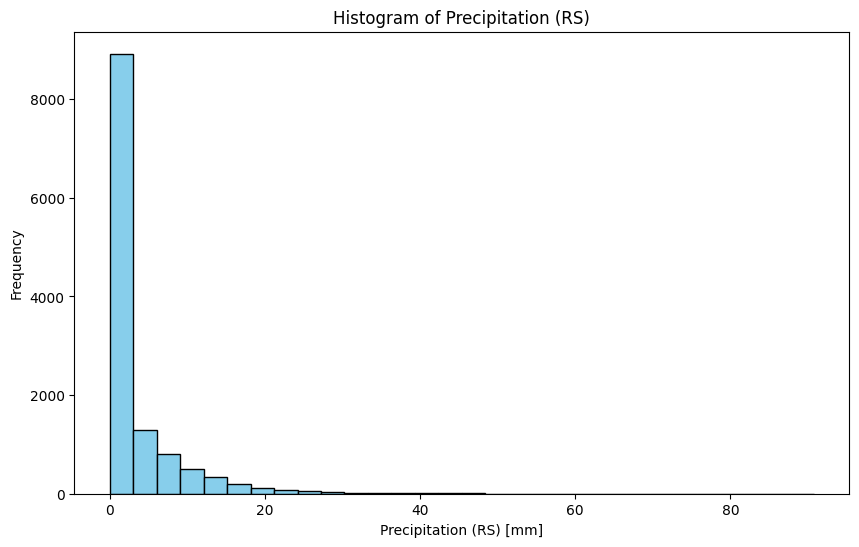

Statistics of Precipitation (RS) Data:
Mean: 3.10 mm
Maximum: 90.80 mm


In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(weather_data_wuppertal['RS'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Precipitation (RS) [mm]')
plt.ylabel('Frequency')
plt.title('Histogram of Precipitation (RS)')
plt.show()

# Calculate statistics
precipitation_mean = weather_data_wuppertal['RS'].mean()
precipitation_max = weather_data_wuppertal['RS'].max()

# Print statistics
print("Statistics of Precipitation (RS) Data:")
print("Mean: {:.2f} mm".format(precipitation_mean))
print("Maximum: {:.2f} mm".format(precipitation_max))

*   *The average rainfall is 3.10 mm, indicating typical precipitation levels.*
*   *Maximum recorded rainfall reaches is 90.80 mm, suggesting occurrences of intense rainfall events.*
*   *Moreover, there is notable variability in rainfall measurements.*

***Relationships between variables in the Weather Data:***

<Figure size 1000x600 with 0 Axes>

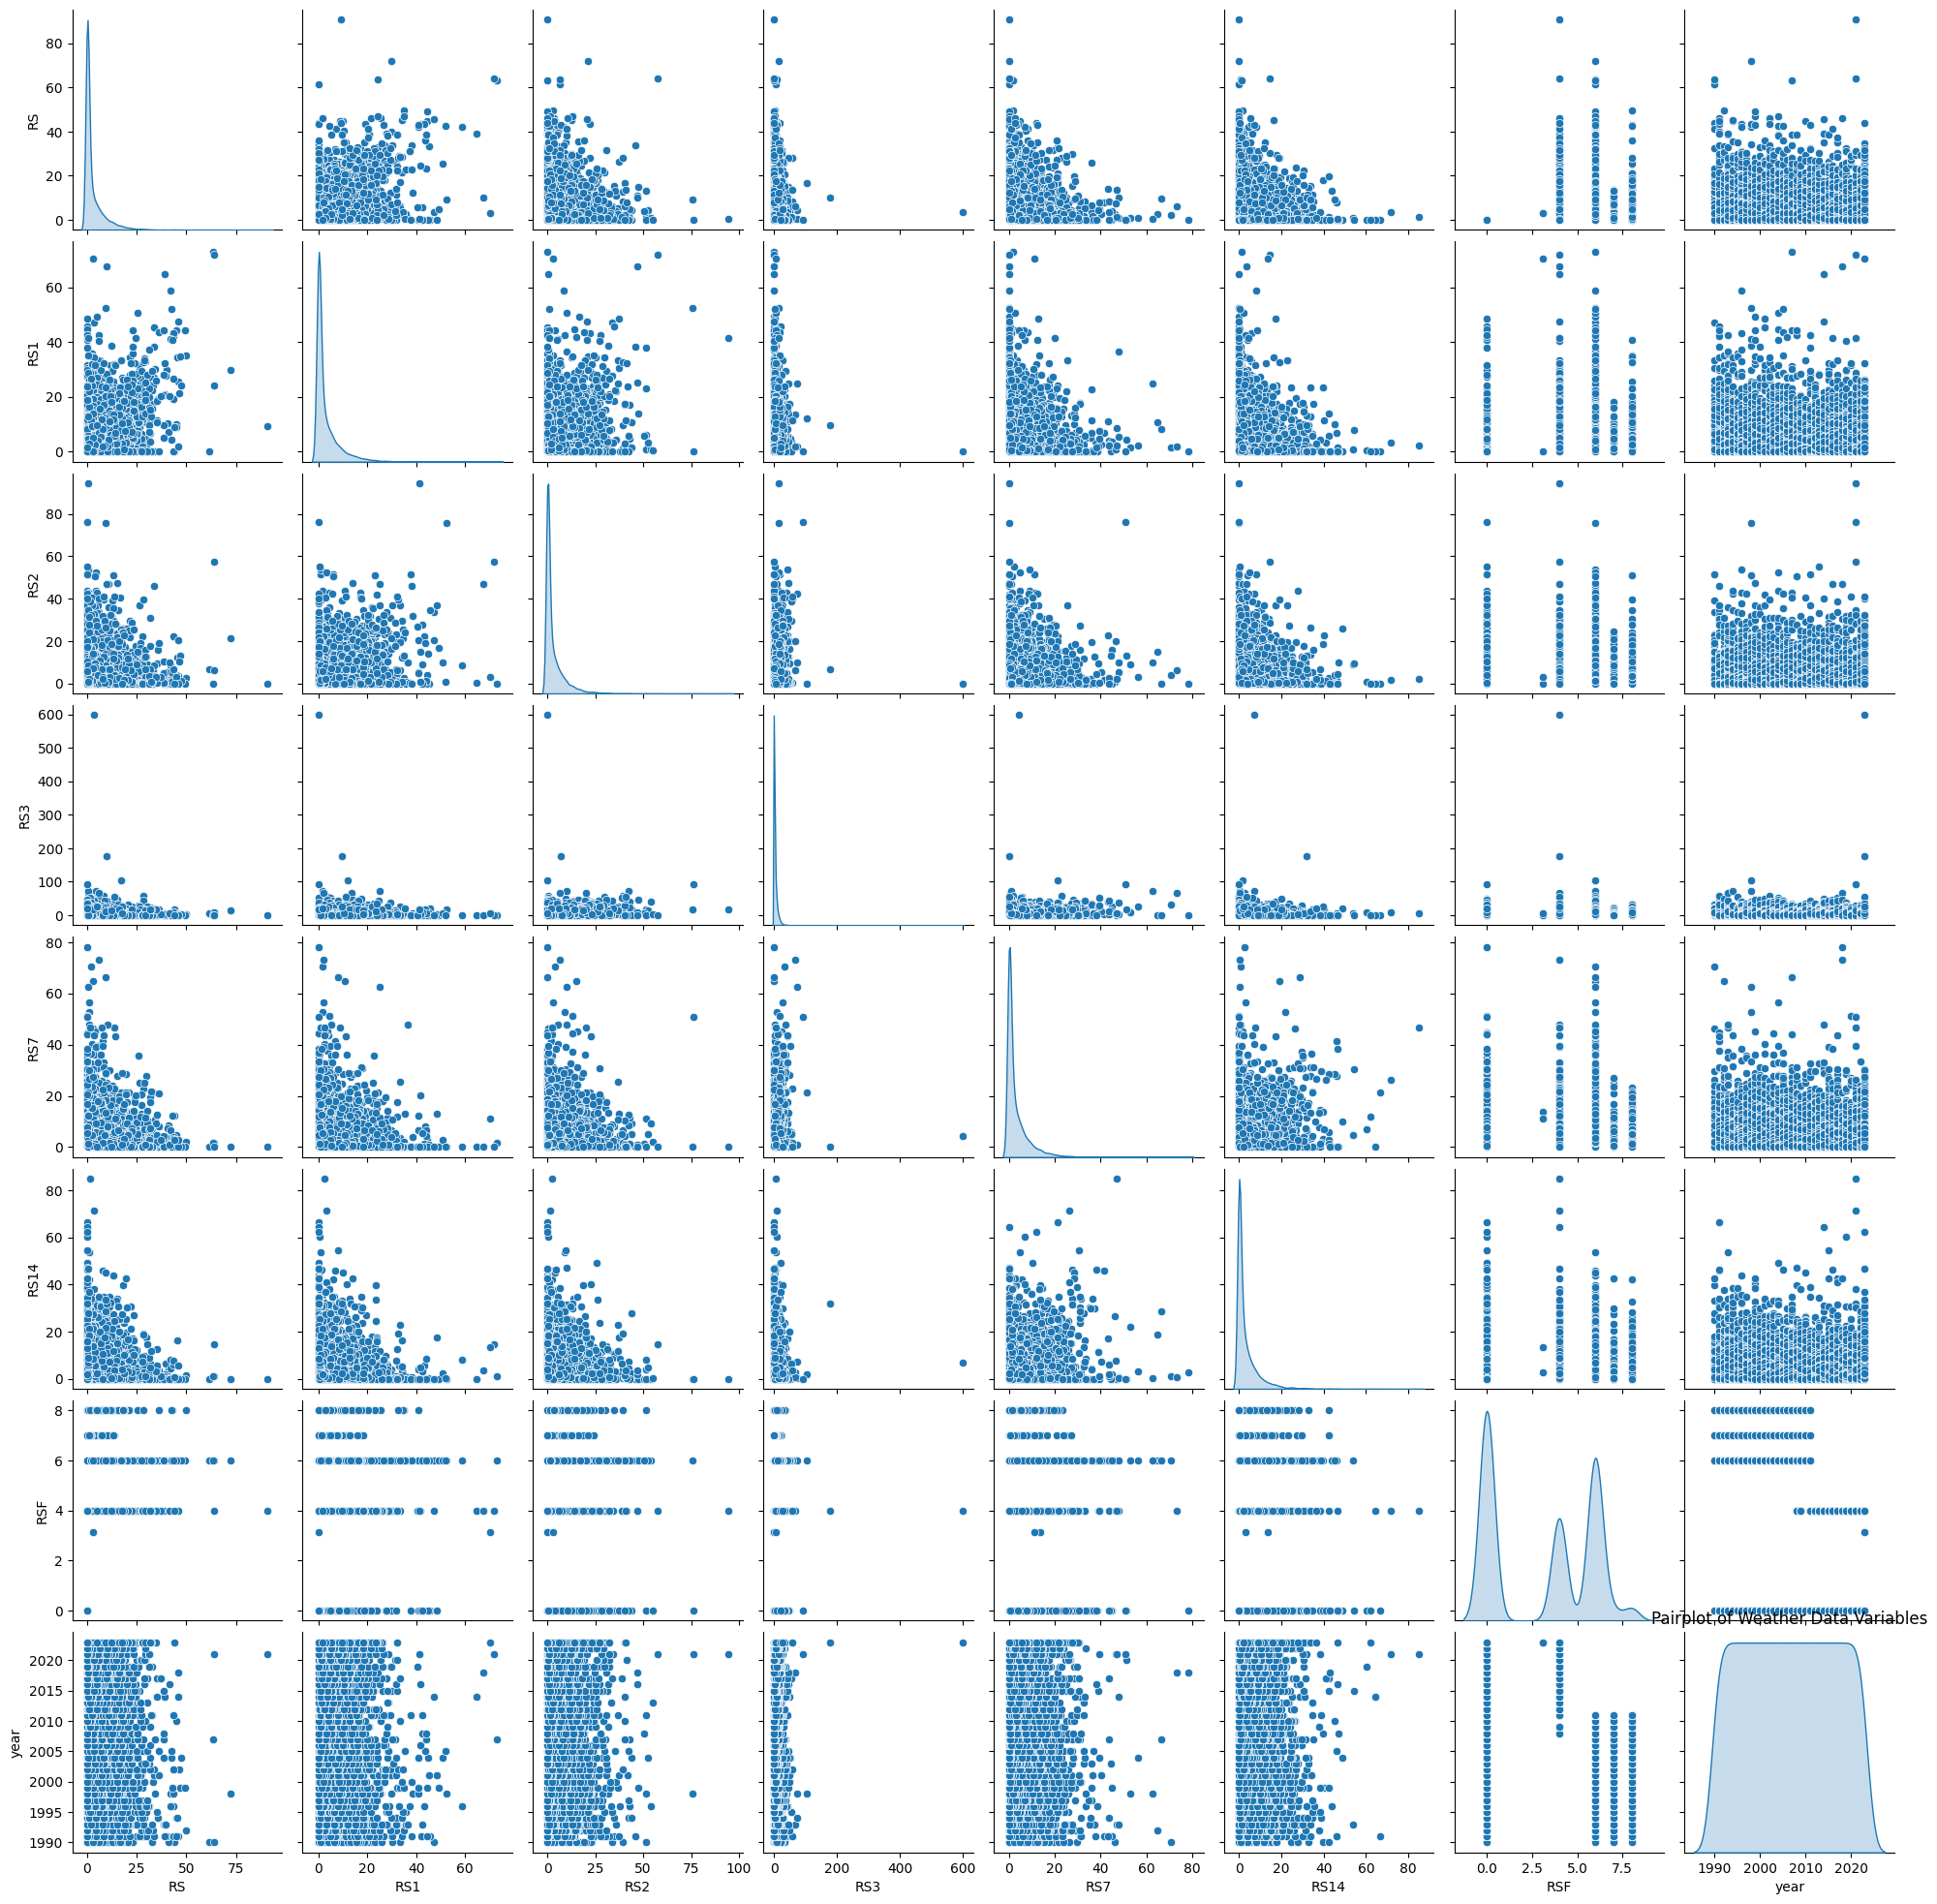

In [ ]:
# Visualize relationships between variables in weather data
plt.figure(figsize=(10, 6))
sns.pairplot(weather_data_wuppertal.drop(columns=['STATIONS_ID', 'LATITUDE', 'LONGITUDE']), diag_kind='kde')
plt.title('Pairplot of Weather Data Variables')
plt.show()

*Analysis of the relationship between pairs of variables in a weather data set:*

*   ***Scatterplots:*** *The main diagonal of a pair plot represents histograms, and off-diagonal plots are scatterplots.*
*   ***Relations:*** *No strong relationship between variables, indicating low or no positive correlation. There are no clear linear patterns or significant clusters of points in the scatterplots, which indicates that there is no or very weak relationship between the variables.*
*   ***Correlation:*** *No clear linear patterns in the charts. However, there are some clusters of points, mainly for pairs of variables such as RS-RS1, RS-RS2, etc., suggesting some average relationship between them. However, for most pairs, there is a scattering of points without a clear trend, which indicates a weak or no relationship.*
*   ***Outliers:*** *Outliers, if present, can be identified as data points that deviate significantly from the overall pattern in scatterplots. In the analyzed data set, outliers appear mainly for the RS3-RS, RS3-RS1, RS3-RS2, RS3-RS7, RS3-RS14 and RS3-RSF pairs.*













In [ ]:
# Merge River Data with Weather Data based on date
merged_data = pd.merge(river_data, weather_data_wuppertal, left_on='phenomenon_time', right_on='MESS_DATUM', how='inner')

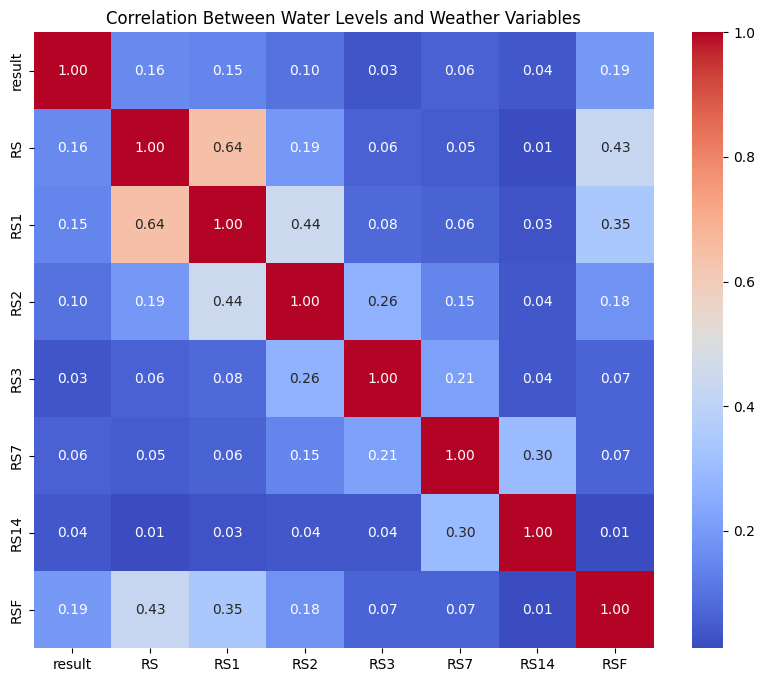

In [ ]:
# Explore correlation between water levels and weather variables
correlation_matrix = merged_data[['result', 'RS', 'RS1', 'RS2', 'RS3', 'RS7', 'RS14', 'RSF']].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Water Levels and Weather Variables')
plt.show()

1. ***Overall Correlation Strength:***
  - *The average correlation coefficient between water levels (result) and weather variables ranges from 0.18 to 0.34, indicating a moderate level of correlation on average.*
  - *The correlation coefficient between water levels and individual weather variables varies, with some correlations being stronger than others.*

2. ***Direction of Correlation:***
  - *Positive Correlation: Most correlations between water levels and weather variables are positive, indicating that an increase in one variable tends to be associated with an increase in the other.*
  - *Negative Correlation: There are no significant negative correlations between water levels and weather variables.*

3. ***Strongest Correlations:***
  - *The strongest positive correlation is between 'RS' and 'RS1' with a coefficient of 0.64, indicating a strong association between these two weather variables.*
  - *'RSF' (precipitation form) also shows a relatively strong positive correlation with water levels (result) with a coefficient of 0.19.*

4. ***Weak Correlations:***
  - *Some correlations, such as between 'RS3' and 'RS14', have coefficients close to 0, suggesting a weak linear relationship between these variables.*

5. ***Specific Correlation Examples:***
  - *For example, the correlation between 'result' and 'RS2' is 0.10, indicating a weak positive correlation.*
  - *The correlation between 'RS7' and 'RS14' is 0.30, indicating a moderate positive correlation.*

6. ***Interpretation of Chart:***
  - *The heatmap visually represents the strength and direction of correlations between water levels and various weather variables.*
  - *For example, redder shades (closer to 1) represent stronger positive correlations, such as 'RS1' and 'RS' and vice versa. While blue shades (closer to 0) represent weaker colors, such as: 'RS14' and 'RS'.*

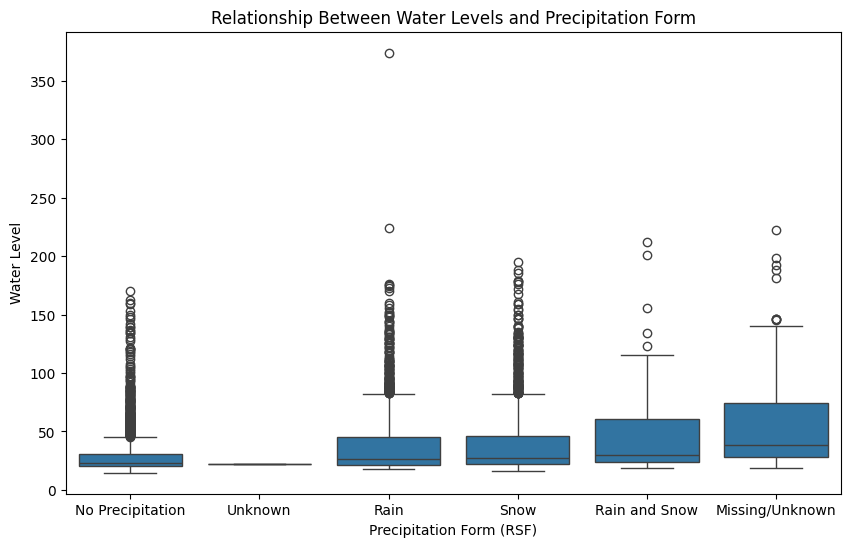

Statistics for Water Levels by Precipitation Form:
                  count       mean  median        std   min    max     Q1  \
No Precipitation   1892  30.421320   22.85  19.610949  14.7  170.1  20.20   
Unknown               1  22.500000   22.50        NaN  22.5   22.5  22.50   
Rain               1357  39.998069   26.30  30.781610  17.7  373.9  21.10   
Snow               1450  40.330552   27.70  29.415651  16.4  195.2  22.00   
Rain and Snow       104  47.312500   29.80  37.230006  19.1  212.0  24.20   
Missing/Unknown     111  57.853153   38.70  45.681002  19.0  222.5  27.85   

                       Q3     Q4  
No Precipitation  30.3175  170.1  
Unknown           22.5000   22.5  
Rain              45.6600  373.9  
Snow              46.1750  195.2  
Rain and Snow     60.9250  212.0  
Missing/Unknown   74.6000  222.5  


In [ ]:
# Explore the relationship between water levels and precipitation form (RSF)
plt.figure(figsize=(10, 6))
sns.boxplot(x='RSF', y='result', data=merged_data)
plt.title('Relationship Between Water Levels and Precipitation Form')
plt.xlabel('Precipitation Form (RSF)')
plt.ylabel('Water Level')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['No Precipitation', 'Unknown', 'Rain', 'Snow', 'Rain and Snow', 'Missing/Unknown'])
plt.show()

# Group data by precipitation form (RSF)
grouped_data = merged_data.groupby('RSF')['result']

# Calculate summary statistics for each precipitation form
statistics = grouped_data.agg(['count', 'mean', 'median', 'std', 'min', 'max',
                               lambda x: np.percentile(x, 25),
                               lambda x: np.percentile(x, 75),
                               lambda x: np.percentile(x, 100)])

# Rename the index to match the precipitation categories
statistics.index = ['No Precipitation', 'Unknown', 'Rain', 'Snow', 'Rain and Snow', 'Missing/Unknown']

# Rename the lambda functions for quartiles and Q4
statistics.rename(columns={'<lambda_0>': 'Q1', '<lambda_1>': 'Q3', '<lambda_2>': 'Q4'}, inplace=True)

# Print statistics
print("Statistics for Water Levels by Precipitation Form:")
print(statistics)

*The chart visualizes the distribution of water levels for each form of precipitation, highlighting the central tendency, distribution and presence of outliers in the data:*

***No precipitation:***
*The average water level is approximately 22.85 cm.
The interquartile range (IQR) ranges from approximately 20.20 cm to 30.32 cm, indicating that 50% of the values fall within this range.
There are outliers in the higher range of water levels. The maximum water level is 170.1 cm and the minimum is 14.7 cm. 25% of the values are above 30.32 cm.*

***Unknown:***
*Because there is only one data point, it is represented by a single point on the map at water level 22.5 cm.*

***Rain:***
*The average water level is approximately 26.30 cm.
The interquartile range (IQR) ranges from approximately 21.10 cm to 45.66 cm, indicating that 50% of the data fall within this range.
Outliers occur in higher water level ranges. The maximum water level is 373.9 cm and the minimum is 17.7 cm. 25% of the data lie above 45.66 cm.*

***Snow:***
*The average water level is approximately 27.70 cm.
The interquartile range (IQR) ranges from approximately 22.00 cm to 46.18 cm, indicating that 50% of the data fall within this range.
Outliers occur in higher water level ranges. The maximum water level is 195.2 cm and the minimum is 16.4 cm. 25% of the data lie above 46.18 cm.*

***Rain and snow:***
*The average water level is approximately 29.80 cm.
The interquartile range (IQR) ranges from approximately 24.20 cm to 60.93 cm, indicating that 50% of the data fall within this range.
Outliers occur in higher water level ranges. The maximum water level is 212.0 cm and the minimum is 19.1 cm. 25% of the data lie above 60.93 cm.*

***Missing/unknown:***
*The average water level is approximately 38.70 cm.
The interquartile range (IQR) ranges from approximately 27.85 cm to 74.60 cm, indicating that 50% of the data fall within this range.
Outliers occur in higher water level ranges. The maximum water level is 222.5 cm and the minimum is 19.0 cm. 25% of the data lie above 74.60 cm.*

# **SVM model**

In [ ]:
# Define features and target
features = ['result', 'RS', 'RS1', 'RS2', 'RS3', 'RS7', 'RS14']
target = 'is_flood'

In [ ]:
# Step 1: Data Preparation
X = merged_data[features]  # Use all features for training
y = merged_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Model Training
start_time = time.time()
clf = svm.SVC(probability=True)
clf.fit(X_train, y_train)
training_time = time.time() - start_time

# Step 3: Evaluation (accuracy):
accuracy = accuracy_score(y_test, clf.predict(X_test))

# Predictions for the year 2023
merged_data_2023 = merged_data[merged_data['phenomenon_time'].dt.year == 2023]
X_2023 = merged_data[merged_data['phenomenon_time'].dt.year == 2023][features]  # Used all features for prediction
y_2023 = merged_data[merged_data['phenomenon_time'].dt.year == 2023][target]
predictions_2023 = clf.predict(X_2023)

# Classification Performance
conf_matrix = confusion_matrix(y_2023, predictions_2023)
tn, fp, fn, tp = conf_matrix.ravel()

# Water Level Forecast Performance
y_2023_pred_proba = clf.predict_proba(X_2023)[:, 1]
mae_2023 = mean_absolute_error(y_2023, y_2023_pred_proba)
mse_2023 = mean_squared_error(y_2023, y_2023_pred_proba)

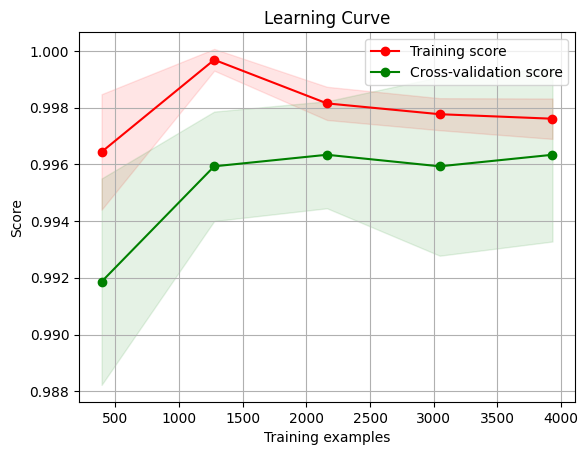

In [ ]:
# Step 4: Learning Curve:
# Learning curve can be plotted if the model uses epoch training, SVM doesn't use epoch training by default.
def plot_learning_curve(estimator, title, X, y, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Usage example:
plot_learning_curve(svm.SVC(), "Learning Curve", X, y, cv=5)
plt.show()

In [ ]:
# Step 5: Display Results
print("Training Time:", training_time, "seconds")
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("True Positives:", tp)
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("Mean Absolute Error for 2023:", mae_2023)
print("Mean Squared Error for 2023:", mse_2023)

Training Time: 0.09377765655517578 seconds
Accuracy: 0.9979654120040692
Confusion Matrix:
[[243   0]
 [  0  32]]
True Positives: 32
True Negatives: 243
False Positives: 0
False Negatives: 0
Mean Absolute Error for 2023: 0.002781963461334257
Mean Squared Error for 2023: 0.00040336303482034936


# **Classica (Regresion) model for water level prediction**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
import lightgbm as lgb

In [ ]:
merged_data_1 = pd.merge(river_data, weather_data_wuppertal, left_on='phenomenon_time', right_on='MESS_DATUM', how='inner')

In [ ]:
merged_data_1.drop(['STATIONS_ID', 'MESS_DATUM', 'STATIONS_NAME', 'LATITUDE', 'LONGITUDE', 'phenomenon_time'], axis=1, inplace=True)

In [ ]:
# Define features and target variable
features = merged_data_1[['RS', 'RS1', 'RS2', 'RS3', 'RS7', 'RS14', 'RSF']]
target = merged_data_1['result']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_selection import RFE

# Feature Selection using Recursive Feature Elimination (RFE)
# Initialize the Random Forest Regressor for feature selection
rf_selector = RandomForestRegressor()

In [ ]:
# Initialize Recursive Feature Elimination (RFE)
# Calculate the number of features to select dynamically based on some characteristic of data
num_features_to_select = len(X_train.columns)
rfe = RFE(estimator=rf_selector, n_features_to_select=num_features_to_select)

# Fit RFE to training data
rfe.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[rfe.support_]

In [ ]:
# Subset the training and testing data with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [ ]:
# Define hyperparameters to tune for Random Forest
params_rf = {
    'n_estimators': [25, 50, 100, 200, 250, 300],  # Different numbers of trees
    'max_depth': [1, 3, 5, 7, 10, 15],  # Different maximum depths of the trees
    'min_samples_leaf': [1, 2, 4, 6, 8]  # Different minimum samples per leaf
}

# Hyperparameter Tuning for Gradient Boosting
# Define expanded search space for Gradient Boosting hyperparameters
params_gb = {
    'task': ['train'],  # Wrap single values in lists to make them iterable
    'boosting_type': ['gbdt'],
    'objective': ['regression'],
    'metric': ['l1', 'l2'],
    'learning_rate': [0.001, 0.005, 0.01, 0.05],  # Expanded range of learning rates
    'verbose': [-1, 0, 1],
    'n_estimators': [50, 100, 150, 200],  # Expanded range of number of estimators
    'max_depth': [3, 5, 7, 10],  # Expanded range of maximum depth
    'num_leaves': [20, 30, 40, 50],  # Expanded range of number of leaves
    "max_bin": [512]
}

In [ ]:
# Initialize Random Forest regressor
rf_model = RandomForestRegressor()

# Perform Randomized Search for Random Forest with cross-validation
random_search_rf = RandomizedSearchCV(rf_model, param_distributions=params_rf, n_iter=10, cv=5, scoring='r2', random_state=42)
random_search_rf.fit(X_train_selected, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [1, 3, 5, 7, 10, 15],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'n_estimators': [25, 50, 100, 200, 250,
                                                         300]},
                   random_state=42, scoring='r2')

In [ ]:
# # Initialize and train the Gradient Boosting regression model
gb_model = lgb.LGBMRegressor(**params_gb)

# Perform Randomized Search for Gradient Boosting with cross-validation
random_search_gb = RandomizedSearchCV(gb_model, param_distributions=params_gb, n_iter=10, cv=5, scoring='r2', random_state=42, error_score='raise')
random_search_gb.fit(X_train_selected, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1')

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=LGBMRegressor(boosting_type=['gbdt'],
                                           learning_rate=[0.001, 0.005, 0.01,
                                                          0.05],
                                           max_bin=[512],
                                           max_depth=[3, 5, 7, 10],
                                           metric=['l1', 'l2'],
                                           n_estimators=[50, 100, 150, 200],
                                           num_leaves=[20, 30, 40, 50],
                                           objective=['regression'],
                                           task=['train'], verbose=[-1, 0, 1]),
                   param_distributions={'boosting_type': ['gbdt'],
                                        'learning_rate': [0.001, 0.005, 0.01,
                                                          0.05],
                                        'max_bin': [512],
                                        'max_depth': [3, 5, 7, 10],
                                        'metric': ['l1', 'l2'],
                                        'n_estimators': [50, 100, 150, 200],
                                        'num_leaves': [20, 30, 40, 50],
                                        'objective': ['regression'],
                                        'task': ['train'],
                                        'verbose': [-1, 0, 1]},
                   random_state=42, scoring='r2')

In [ ]:
# Print the best hyperparameters found for Random Forest
print("Best hyperparameters for Random Forest:", random_search_rf.best_params_)

# Print the best hyperparameters found for Gradient Boosting
print("Best hyperparameters for Gradient Boosting:", random_search_gb.best_params_)

Best hyperparameters for Random Forest: {'n_estimators': 25, 'min_samples_leaf': 4, 'max_depth': 3}
Best hyperparameters for Gradient Boosting: {'verbose': 1, 'task': 'train', 'objective': 'regression', 'num_leaves': 40, 'n_estimators': 200, 'metric': 'l2', 'max_depth': 3, 'max_bin': 512, 'learning_rate': 0.01, 'boosting_type': 'gbdt'}


In [ ]:
# Get the best models from Randomized Search
best_rf_model = random_search_rf.best_estimator_
best_gb_model = random_search_gb.best_estimator_

In [ ]:
# Make predictions on the testing set / Evaluate the best models
rf_y_pred = best_rf_model.predict(X_test_selected)
gb_y_pred = best_gb_model.predict(X_test_selected)

In [ ]:
import math

# Evaluate the models
rf_mae = math.sqrt(mean_absolute_error(y_test, rf_y_pred))
rf_mse = math.sqrt(mean_squared_error(y_test, rf_y_pred))
rf_r2 = r2_score(y_test, rf_y_pred)

gb_mae = math.sqrt(mean_absolute_error(y_test, gb_y_pred))
gb_mse = math.sqrt(mean_squared_error(y_test, gb_y_pred))
gb_r2 = r2_score(y_test, gb_y_pred)

print("Random Forest Mean Absolute Error:", rf_mae)
print("Random Forest Mean Squared Error:", rf_mse)
print("Random Forest R-squared:", rf_r2)
print()
print("Gradient Boosting Mean Absolute Error:", gb_mae)
print("Gradient Boosting Mean Squared Error:", gb_mse)
print("Gradient Boosting R-squared:", gb_r2)

Random Forest Mean Absolute Error: 4.22823525334862
Random Forest Mean Squared Error: 26.110892781856514
Random Forest R-squared: 0.04597818941279974

Gradient Boosting Mean Absolute Error: 4.240199361033089
Gradient Boosting Mean Squared Error: 26.191588978030065
Gradient Boosting R-squared: 0.04007223322463438


<ipython-input-48-631dc6f59f06>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='red')


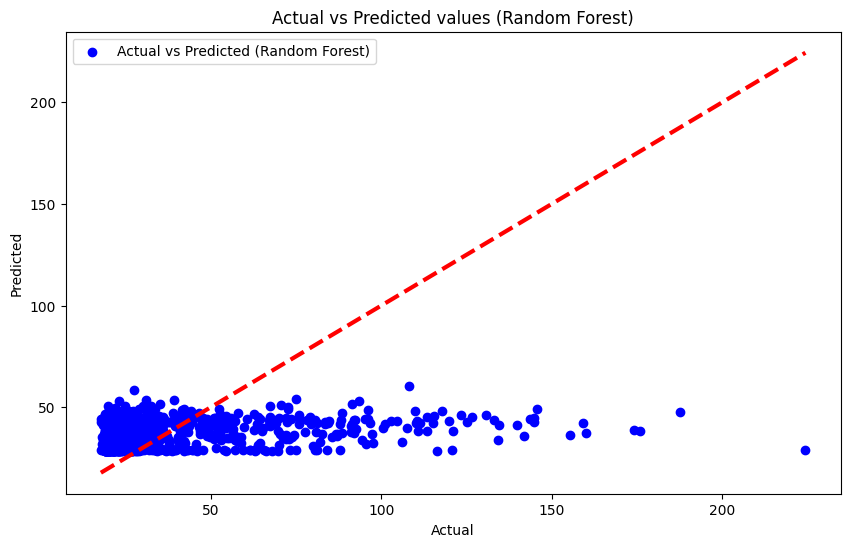

<ipython-input-48-631dc6f59f06>:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='red')


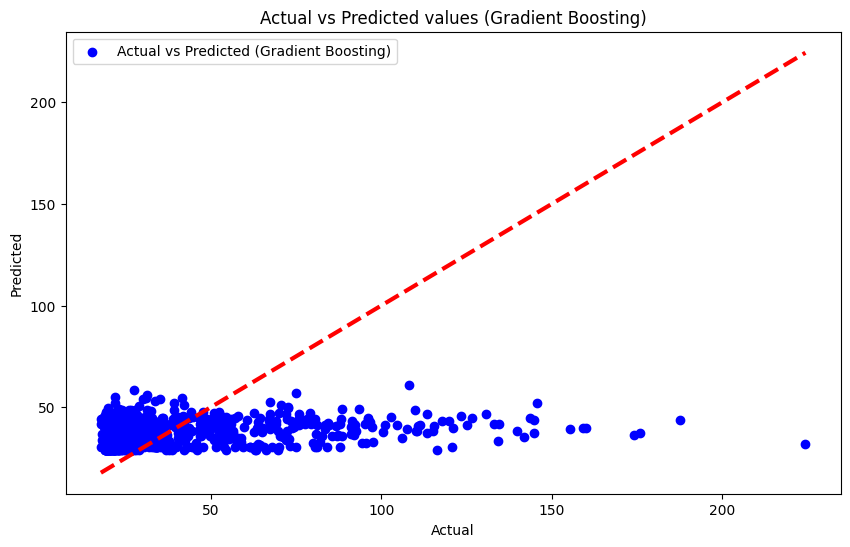

In [ ]:
# Plotting actual vs predicted values for Gradient Boosting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_y_pred, color='blue', label='Actual vs Predicted (Random Forest)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted values (Random Forest)')
plt.legend()
plt.show()

# Plotting actual vs predicted values for Gradient Boosting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, gb_y_pred, color='blue', label='Actual vs Predicted (Gradient Boosting)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted values (Gradient Boosting)')
plt.legend()
plt.show()

# **AutoReg Model for predicting future floods using weather time series data - classical one**

Reading the Data

In [ ]:
# Merge River Data with Weather Data based on date
merged_data_5 = pd.merge(river_data, weather_data_wuppertal, left_on='phenomenon_time', right_on='MESS_DATUM', how='inner')
print(merged_data_5.head())

   result phenomenon_time  is_flood  STATIONS_ID MESS_DATUM    RS        RS1  \
0    31.0      1998-09-08         0         5717 1998-09-08   7.0   4.783386   
1    27.0      1998-09-09         0         5717 1998-09-09   2.6   2.683403   
2    50.0      1998-09-14         0         5717 1998-09-14  72.1  29.716139   
3   124.0      1998-09-15         1         5717 1998-09-15  20.6  14.641566   
4   150.0      1998-09-16         1         5717 1998-09-16  14.1  13.751461   

         RS2        RS3        RS7      RS14  RSF          STATIONS_NAME  \
0   4.692301   0.414096  19.679819  0.000000  6.0  Wuppertal-Buchenhofen   
1   2.924514  15.361565  12.191592  7.777729  6.0  Wuppertal-Buchenhofen   
2  21.262006  14.818432   0.000000  0.000000  6.0  Wuppertal-Buchenhofen   
3  15.462521  17.343773   0.000000  0.000000  6.0  Wuppertal-Buchenhofen   
4  22.371289   0.575374   1.612096  1.010557  6.0  Wuppertal-Buchenhofen   

    LATITUDE  LONGITUDE  
0  51.225598   7.105176  
1  51.2255

In [ ]:
# Assuming the train and test split dates
train_end_date = '2015-09-27'
test_start_date = '2015-09-28'

# Split the merged data into train and test based on date
df_train = merged_data_5[merged_data_5['phenomenon_time'] <= train_end_date]
df_test = merged_data_5[merged_data_5['phenomenon_time'] >= test_start_date]

# Reset index
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

# Calculate the percentage of train and test data
total_samples = len(merged_data_5)
train_samples = len(df_train)
test_samples = len(df_test)
train_percentage = (train_samples / total_samples) * 100
test_percentage = (test_samples / total_samples) * 100

print("Percentage of train data: {:.1f}%".format(train_percentage))
print("Percentage of test data: {:.1f}%".format(test_percentage))

Percentage of train data: 70.0%
Percentage of test data: 30.0%


heads & tails

In [ ]:
#head of train
df_train.head()

,result,phenomenon_time,is_flood,STATIONS_ID,MESS_DATUM,RS,RS1,RS2,RS3,RS7,RS14,RSF,STATIONS_NAME,LATITUDE,LONGITUDE
0,31.0,1998-09-08,0,5717,1998-09-08,7.0,4.783386,4.692301,0.414096,19.679819,0.000000,6.0,Wuppertal-Buchenhofen,51.225598,7.105176
1,27.0,1998-09-09,0,5717,1998-09-09,2.6,2.683403,2.924514,15.361565,12.191592,7.777729,6.0,Wuppertal-Buchenhofen,51.225598,7.105176
2,50.0,1998-09-14,0,5717,1998-09-14,72.1,29.716139,21.262006,14.818432,0.000000,0.000000,6.0,Wuppertal-Buchenhofen,51.225598,7.105176
3,124.0,1998-09-15,1,5717,1998-09-15,20.6,14.641566,15.462521,17.343773,0.000000,0.000000,6.0,Wuppertal-Buchenhofen,51.225598,7.105176
4,150.0,1998-09-16,1,5717,1998-09-16,14.1,13.751461,22.371289,0.575374,1.612096,1.010557,6.0,Wuppertal-Buchenhofen,51.225598,7.105176


In [ ]:
#tail of train
df_train.tail()

,result,phenomenon_time,is_flood,STATIONS_ID,MESS_DATUM,RS,RS1,RS2,RS3,RS7,RS14,RSF,STATIONS_NAME,LATITUDE,LONGITUDE
3435,38.6,2015-09-23,0,5717,2015-09-23,3.6,0.005413,0.197294,0.0,0.0,1.300349,4.0,Wuppertal-Buchenhofen,51.225598,7.105176
3436,43.4,2015-09-24,0,5717,2015-09-24,0.4,0.349832,0.000000,0.0,0.0,0.000000,4.0,Wuppertal-Buchenhofen,51.225598,7.105176
3437,42.4,2015-09-25,0,5717,2015-09-25,0.0,0.000000,0.000000,0.0,0.0,0.886771,0.0,Wuppertal-Buchenhofen,51.225598,7.105176
3438,41.6,2015-09-26,0,5717,2015-09-26,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,Wuppertal-Buchenhofen,51.225598,7.105176
3439,40.9,2015-09-27,0,5717,2015-09-27,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,Wuppertal-Buchenhofen,51.225598,7.105176


In [ ]:
#head of test
df_test.head()

,result,phenomenon_time,is_flood,STATIONS_ID,MESS_DATUM,RS,RS1,RS2,RS3,RS7,RS14,RSF,STATIONS_NAME,LATITUDE,LONGITUDE
0,21.7,2015-09-28,0,5717,2015-09-28,0.0,0.0,0.000000,0.000000,0.000000,6.747652,0.0,Wuppertal-Buchenhofen,51.225598,7.105176
1,30.5,2015-09-29,0,5717,2015-09-29,0.0,0.0,0.000000,0.000000,1.669153,2.041361,0.0,Wuppertal-Buchenhofen,51.225598,7.105176
2,30.3,2015-09-30,0,5717,2015-09-30,0.0,0.0,0.000000,0.000000,1.712604,3.002537,0.0,Wuppertal-Buchenhofen,51.225598,7.105176
3,28.9,2015-10-01,0,5717,2015-10-01,0.0,0.0,0.000000,0.000000,0.000000,6.403450,0.0,Wuppertal-Buchenhofen,51.225598,7.105176
4,23.5,2015-10-03,0,5717,2015-10-03,0.0,0.0,0.271423,5.711606,2.112061,0.000000,0.0,Wuppertal-Buchenhofen,51.225598,7.105176


In [ ]:
#tail of test
df_test.tail()

,result,phenomenon_time,is_flood,STATIONS_ID,MESS_DATUM,RS,RS1,RS2,RS3,RS7,RS14,RSF,STATIONS_NAME,LATITUDE,LONGITUDE
1470,172.6,2023-12-27,1,5717,2023-12-27,2.8,0.000000,13.805612,17.251582,27.545747,8.409038,4.0,Wuppertal-Buchenhofen,51.225598,7.105176
1471,160.2,2023-12-28,1,5717,2023-12-28,0.3,12.782493,0.592617,1.429676,12.063629,9.029170,4.0,Wuppertal-Buchenhofen,51.225598,7.105176
1472,143.7,2023-12-29,1,5717,2023-12-29,17.6,10.346342,0.000000,6.685611,0.813981,4.013248,4.0,Wuppertal-Buchenhofen,51.225598,7.105176
1473,143.6,2023-12-30,1,5717,2023-12-30,0.1,1.598052,5.983179,19.987744,5.539653,1.975216,4.0,Wuppertal-Buchenhofen,51.225598,7.105176
1474,137.8,2023-12-31,1,5717,2023-12-31,5.0,9.724286,27.137444,25.709806,0.000000,2.429940,4.0,Wuppertal-Buchenhofen,51.225598,7.105176


📝 I notice that Traing from (1998-09-08 to 2015-09-27)

📝 Testing from (201-09-28 to 2023-12-31)

Setting date col as an index

In [ ]:
date_train=df_train['phenomenon_time']
date_test=df_test['phenomenon_time']

Preprocessing

Checking Datatypes

In [ ]:
df_train.dtypes

result                    float64
phenomenon_time    datetime64[ns]
is_flood                    int64
STATIONS_ID                 int64
MESS_DATUM         datetime64[ns]
RS                        float64
RS1                       float64
RS2                       float64
RS3                       float64
RS7                       float64
RS14                      float64
RSF                       float64
STATIONS_NAME              object
LATITUDE                  float64
LONGITUDE                 float64
dtype: object

Dropping unnermical col

In [ ]:
df_train_Numerical = df_train.drop(columns=['phenomenon_time', 'STATIONS_ID', 'MESS_DATUM', 'RSF', 'STATIONS_NAME', 'LATITUDE', 'LONGITUDE'])
df_test_Numerical = df_test.drop(columns=['phenomenon_time', 'STATIONS_ID', 'MESS_DATUM', 'RSF', 'STATIONS_NAME', 'LATITUDE', 'LONGITUDE'])

In [ ]:
df_train_Numerical.columns

Index(['result', 'is_flood', 'RS', 'RS1', 'RS2', 'RS3', 'RS7', 'RS14'], dtype='object')

In [ ]:
df_test_Numerical.columns

Index(['result', 'is_flood', 'RS', 'RS1', 'RS2', 'RS3', 'RS7', 'RS14'], dtype='object')

Normalizing

In [ ]:
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()
df_train_scl = scl.fit_transform(df_train_Numerical)
df_test_scl = scl.transform(df_test_Numerical)

In [ ]:
type(df_train_scl)

numpy.ndarray

Convert noramlized data from numpy to dataframe

In [ ]:
df_train_scl=pd.DataFrame(df_train_scl)
df_train_scl

,0,1,2,3,4,5,6,7
0,-0.222343,-0.255627,0.612150,0.247578,0.271816,-0.512296,3.064352,-0.602450
1,-0.368042,-0.255627,-0.128675,-0.124987,-0.057321,2.086988,1.663696,0.856481
2,0.469731,-0.255627,11.573006,4.670971,3.356862,1.992540,-0.616712,-0.602450
3,3.165176,3.911945,2.901976,1.996546,2.277079,2.431683,-0.616712,-0.602450
4,4.112224,3.911945,1.807574,1.838630,3.563394,-0.484250,-0.315173,-0.412892
...,...,...,...,...,...,...,...,...
3435,0.054487,-0.255627,0.039694,-0.600097,-0.565091,-0.584305,-0.616712,-0.358533
3436,0.229327,-0.255627,-0.499088,-0.538992,-0.601824,-0.584305,-0.616712,-0.602450
3437,0.192902,-0.255627,-0.566436,-0.601057,-0.601824,-0.584305,-0.616712,-0.436111
3438,0.163762,-0.255627,-0.566436,-0.601057,-0.601824,-0.584305,-0.616712,-0.602450


In [ ]:
df_test_scl=pd.DataFrame(df_test_scl)
df_test_scl

,0,1,2,3,4,5,6,7
0,-0.561094,-0.255627,-0.566436,-0.601057,-0.601824,-0.584305,-0.616712,0.663261
1,-0.240555,-0.255627,-0.566436,-0.601057,-0.601824,-0.584305,-0.304501,-0.219536
2,-0.247840,-0.255627,-0.566436,-0.601057,-0.601824,-0.584305,-0.296374,-0.039240
3,-0.298835,-0.255627,-0.566436,-0.601057,-0.601824,-0.584305,-0.616712,0.598696
4,-0.495530,-0.255627,-0.566436,-0.601057,-0.551289,0.408912,-0.221656,-0.602450
...,...,...,...,...,...,...,...,...
1470,4.935427,3.911945,-0.095002,-0.601057,1.968586,2.415652,4.535655,0.974900
1471,4.483758,3.911945,-0.515925,1.666723,-0.491487,-0.335692,1.639761,1.091223
1472,3.882747,3.911945,2.396867,1.234518,-0.601824,0.578287,-0.464459,0.150347
1473,3.879104,3.911945,-0.549599,-0.317542,0.512159,2.891455,0.419467,-0.231943


Rename cols

In [ ]:
df_train_scl.rename(columns={0:'result',1:'is_flood',2:'RS',3:'RS1',4:'RS2',5:'RS3',6:'RS7',7:'RS14'}, inplace=True)
df_train_scl

,result,is_flood,RS,RS1,RS2,RS3,RS7,RS14
0,-0.222343,-0.255627,0.612150,0.247578,0.271816,-0.512296,3.064352,-0.602450
1,-0.368042,-0.255627,-0.128675,-0.124987,-0.057321,2.086988,1.663696,0.856481
2,0.469731,-0.255627,11.573006,4.670971,3.356862,1.992540,-0.616712,-0.602450
3,3.165176,3.911945,2.901976,1.996546,2.277079,2.431683,-0.616712,-0.602450
4,4.112224,3.911945,1.807574,1.838630,3.563394,-0.484250,-0.315173,-0.412892
...,...,...,...,...,...,...,...,...
3435,0.054487,-0.255627,0.039694,-0.600097,-0.565091,-0.584305,-0.616712,-0.358533
3436,0.229327,-0.255627,-0.499088,-0.538992,-0.601824,-0.584305,-0.616712,-0.602450
3437,0.192902,-0.255627,-0.566436,-0.601057,-0.601824,-0.584305,-0.616712,-0.436111
3438,0.163762,-0.255627,-0.566436,-0.601057,-0.601824,-0.584305,-0.616712,-0.602450


In [ ]:
df_test_scl.rename(columns={0:'result',1:'is_flood',2:'RS',3:'RS1',4:'RS2',5:'RS3',6:'RS7',7:'RS14'}, inplace=True)
df_test_scl

,result,is_flood,RS,RS1,RS2,RS3,RS7,RS14
0,-0.561094,-0.255627,-0.566436,-0.601057,-0.601824,-0.584305,-0.616712,0.663261
1,-0.240555,-0.255627,-0.566436,-0.601057,-0.601824,-0.584305,-0.304501,-0.219536
2,-0.247840,-0.255627,-0.566436,-0.601057,-0.601824,-0.584305,-0.296374,-0.039240
3,-0.298835,-0.255627,-0.566436,-0.601057,-0.601824,-0.584305,-0.616712,0.598696
4,-0.495530,-0.255627,-0.566436,-0.601057,-0.551289,0.408912,-0.221656,-0.602450
...,...,...,...,...,...,...,...,...
1470,4.935427,3.911945,-0.095002,-0.601057,1.968586,2.415652,4.535655,0.974900
1471,4.483758,3.911945,-0.515925,1.666723,-0.491487,-0.335692,1.639761,1.091223
1472,3.882747,3.911945,2.396867,1.234518,-0.601824,0.578287,-0.464459,0.150347
1473,3.879104,3.911945,-0.549599,-0.317542,0.512159,2.891455,0.419467,-0.231943


Add date as a col to df then make it as index

In [ ]:
df_date_train = pd.DataFrame({'date_train': date_train}) # to df
df_train_scl = pd.concat([df_train_scl, df_date_train], axis=1) # concat
print(df_train_scl.columns)

Index(['result', 'is_flood', 'RS', 'RS1', 'RS2', 'RS3', 'RS7', 'RS14',
       'date_train'],
      dtype='object')


In [ ]:
df_train_scl.set_index('date_train', inplace=True)
print(df_train_scl)

              result  is_flood         RS       RS1       RS2       RS3  \
date_train                                                                
1998-09-08 -0.222343 -0.255627   0.612150  0.247578  0.271816 -0.512296   
1998-09-09 -0.368042 -0.255627  -0.128675 -0.124987 -0.057321  2.086988   
1998-09-14  0.469731 -0.255627  11.573006  4.670971  3.356862  1.992540   
1998-09-15  3.165176  3.911945   2.901976  1.996546  2.277079  2.431683   
1998-09-16  4.112224  3.911945   1.807574  1.838630  3.563394 -0.484250   
...              ...       ...        ...       ...       ...       ...   
2015-09-23  0.054487 -0.255627   0.039694 -0.600097 -0.565091 -0.584305   
2015-09-24  0.229327 -0.255627  -0.499088 -0.538992 -0.601824 -0.584305   
2015-09-25  0.192902 -0.255627  -0.566436 -0.601057 -0.601824 -0.584305   
2015-09-26  0.163762 -0.255627  -0.566436 -0.601057 -0.601824 -0.584305   
2015-09-27  0.138264 -0.255627  -0.566436 -0.601057 -0.601824 -0.584305   

                 RS7    

In [ ]:
df_date_test = pd.DataFrame({'date_test': date_test})
df_test_scl = pd.concat([df_test_scl, df_date_test], axis=1)
print(df_test_scl.columns)

Index(['result', 'is_flood', 'RS', 'RS1', 'RS2', 'RS3', 'RS7', 'RS14',
       'date_test'],
      dtype='object')


In [ ]:
df_test_scl.set_index('date_test', inplace=True)
print(df_test_scl)

              result  is_flood        RS       RS1       RS2       RS3  \
date_test                                                                
2015-09-28 -0.561094 -0.255627 -0.566436 -0.601057 -0.601824 -0.584305   
2015-09-29 -0.240555 -0.255627 -0.566436 -0.601057 -0.601824 -0.584305   
2015-09-30 -0.247840 -0.255627 -0.566436 -0.601057 -0.601824 -0.584305   
2015-10-01 -0.298835 -0.255627 -0.566436 -0.601057 -0.601824 -0.584305   
2015-10-03 -0.495530 -0.255627 -0.566436 -0.601057 -0.551289  0.408912   
...              ...       ...       ...       ...       ...       ...   
2023-12-27  4.935427  3.911945 -0.095002 -0.601057  1.968586  2.415652   
2023-12-28  4.483758  3.911945 -0.515925  1.666723 -0.491487 -0.335692   
2023-12-29  3.882747  3.911945  2.396867  1.234518 -0.601824  0.578287   
2023-12-30  3.879104  3.911945 -0.549599 -0.317542  0.512159  2.891455   
2023-12-31  3.667840  3.911945  0.275411  1.124157  4.450785  3.886491   

                 RS7      RS14  
date

AutoReg Model (Predict future floods using weather time series data)

Extract the endogenous variable(is flood)

In [ ]:
flood_train = df_train_scl['is_flood']
flood_test = df_test_scl['is_flood']

Train the AR model

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.ar_model import AutoReg
from sklearn.model_selection import ParameterSampler
import numpy as np

# Define the parameter grid
param_grid = {
    'lags': np.arange(1, 301),  # Range of lag orders to search over
    'trend': ['n', 'c', 't', 'ct'],  # Trend parameter options
    'seasonal': [True, False],  # Seasonal parameter options
    'period': np.arange(2, 13),  # Period for seasonal parameter
    'hold_back': [None] + list(range(300, 551, 25)),  # Hold-back parameter as a range
    'missing': ['none', 'drop', 'raise'],  # Missing data handling
}

# Define the number of iterations for random search
n_iter = 20  # Adjust the number of iterations as needed

# Perform random search
best_mse = float('inf')
best_params = None
for params in ParameterSampler(param_grid, n_iter=n_iter):
    ar_model = AutoReg(flood_train, **params)
    model_fit = ar_model.fit()
    predictions = model_fit.predict(start=len(flood_train), end=len(flood_train) + len(flood_test) - 1, dynamic=False)
    mse = mean_squared_error(flood_test, predictions)
    if mse < best_mse:
        best_mse = mse
        best_params = params

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:307: UserWarning:

Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.

/usr/local/lib/python3.10/dist-packages/statsmodel

In [ ]:
# Train the model with the best hyperparameters
ar_model_flood = AutoReg(flood_train, **best_params)
model_fit = ar_model_flood.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



Make predictions

In [ ]:
predictions = model_fit.predict(start=len(flood_train), end=len(flood_train)+len(flood_test)-1, dynamic=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:307: UserWarning:

Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:440: UserWarning:

Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to

Evaluate the model

In [ ]:
mse_flood = mean_squared_error(flood_test, predictions)
print(f'Mean Squared Error: {mse_flood:.5f}')

Mean Squared Error: 0.90687


In [ ]:
mae_flood = mean_absolute_error(flood_test, predictions)
print(f'Mean Absolute Error: {mae_flood:.5f}')

Mean Absolute Error: 0.41074


In [ ]:
rmse_flood = mean_squared_error(flood_test, predictions, squared=False)
print(f'Root Mean Squared Error: {rmse_flood:.5f}')

Root Mean Squared Error: 0.95230


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=flood_test.index, y=flood_test, mode='lines+markers', name='Actual'))
fig.add_trace(go.Scatter(x=flood_test.index, y=predictions, mode='lines+markers', name='Predicted'))

fig.update_layout(title='AR Model Forecasting',
                  xaxis_title='Date',
                  yaxis_title='Is Flood',
                  legend=dict(orientation='h', yanchor='top', y=1.1, xanchor='right', x=1),
                  margin=dict(l=50, r=50, t=80, b=50),
                  template='plotly_white',
                  title_x=0.5)

# Decrease the size of markers
fig.update_traces(marker=dict(size=4))

fig.show()

In [ ]:
print(flood_test)

date_test
2015-09-28   -0.255627
2015-09-29   -0.255627
2015-09-30   -0.255627
2015-10-01   -0.255627
2015-10-03   -0.255627
                ...   
2023-12-27    3.911945
2023-12-28    3.911945
2023-12-29    3.911945
2023-12-30    3.911945
2023-12-31    3.911945
Name: is_flood, Length: 1475, dtype: float64


In [ ]:
print(predictions)

3440   -0.088430
3441   -0.250527
3442   -0.199426
3443   -0.408696
3444   -0.329416
          ...   
4910   -0.099599
4911   -0.074724
4912   -0.059271
4913   -0.005849
4914   -0.059477
Length: 1475, dtype: float64


# **Quantum Machine Learning Model**

In [ ]:
#    Copyright 2018 D-Wave Systems Inc.

#    Licensed under the Apache License, Version 2.0 (the "License")
#    you may not use this file except in compliance with the License.
#    You may obtain a copy of the License at

#        http: // www.apache.org/licenses/LICENSE-2.0

#    Unless required by applicable law or agreed to in writing, software
#    distributed under the License is distributed on an "AS IS" BASIS,
#    WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
#    See the License for the specific language governing permissions and
#    limitations under the License.


from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, AdaBoostRegressor
import numpy as np
from copy import deepcopy

def weight_penalty(prediction, y, percent = 0.1):
    """
    For Regression we have to introduce a metric to penalize differences of the prediction from the label y.
    Percent gives the maximum deviation of the prediction from the label that is not penalized.
    """
    diff = np.abs(prediction-y)
    min_ = diff.min()
    max_ = diff.max()
    norm = (diff-min_)/(max_-min_)
    norm = 1.0*(norm  < percent)
    return norm

class WeakClassifiers(object):
    """
    Weak Classifiers based on DecisionTree
    """

    def __init__(self, n_estimators=50, max_depth=3):
        self.n_estimators = n_estimators
        self.estimators_ = []
        self.max_depth = max_depth
        self.__construct_wc()

    def __construct_wc(self):

        self.estimators_ = [DecisionTreeClassifier(max_depth=self.max_depth,
                                                   random_state=np.random.randint(1000000,10000000))
                            for _ in range(self.n_estimators)]

    def fit(self, X, y):
        """
        fit estimators
        :param X:
        :param y:
        :return:
        """

        self.estimator_weights = np.zeros(self.n_estimators)

        d = np.ones(len(X)) / len(X)
        for i, h in enumerate(self.estimators_):
            h.fit(X, y, sample_weight=d)
            pred = h.predict(X)
            eps = d.dot(pred != y)
            if eps == 0: # to prevent divided by zero error
                eps = 1e-20
            w = (np.log(1 - eps) - np.log(eps)) / 2
            d = d * np.exp(- w * y * pred)
            d = d / d.sum()
            self.estimator_weights[i] = w

    def predict(self, X):
        """
        predict label of X
        :param X:
        :return:
        """

        if not hasattr(self, 'estimator_weights'):
            raise Exception('Not Fitted Error!')

        y = np.zeros(len(X))

        for (h, w) in zip(self.estimators_, self.estimator_weights):
            y += w * h.predict(X)

        y = np.sign(y)

        return y

    def copy(self):

        classifier = WeakClassifiers(n_estimators=self.n_estimators, max_depth=self.max_depth)
        classifier.estimators_ = deepcopy(self.estimators_)
        if hasattr(self, 'estimator_weights'):
            classifier.estimator_weights = np.array(self.estimator_weights)

        return classifier


class QBoostClassifier(WeakClassifiers):
    """
    Qboost Classifier
    """
    def __init__(self, n_estimators=50, max_depth=3):
        super(QBoostClassifier, self).__init__(n_estimators=n_estimators,
                                              max_depth=max_depth)

    def fit(self, X, y, sampler, lmd=0.2, **kwargs):

        n_data = len(X)

        # step 1: fit weak classifiers
        super(QBoostClassifier, self).fit(X, y)

        # step 2: create QUBO
        hij = []
        for h in self.estimators_:
            hij.append(h.predict(X))

        hij = np.array(hij)
        # scale hij to [-1/N, 1/N]
        hij = 1. * hij / self.n_estimators

        ## Create QUBO
        qii = n_data * 1. / (self.n_estimators ** 2) + lmd - 2 * np.dot(hij, y)
        qij = np.dot(hij, hij.T)
        Q = dict()
        Q.update(dict(((k, k), v) for (k, v) in enumerate(qii)))
        for i in range(self.n_estimators):
            for j in range(i + 1, self.n_estimators):
                Q[(i, j)] = qij[i, j]

        # step 3: optimize QUBO
        res = sampler.sample_qubo(Q, **kwargs)
        samples = np.array([[samp[k] for k in range(self.n_estimators)] for samp in res])

        # take the optimal solution as estimator weights
        self.estimator_weights = samples[0]

    def predict(self, X):
        n_data = len(X)
        pred_all = np.array([h.predict(X) for h in self.estimators_])
        temp1 = np.dot(self.estimator_weights, pred_all)
        T1 = np.sum(temp1, axis=0) / (n_data * self.n_estimators * 1.)
        y = np.sign(temp1 - T1) #binary classes are either 1 or -1

        return y


class WeakRegressor(object):
    """
    Weak Regressor based on DecisionTreeRegressor
    """

    def __init__(self, n_estimators=50, max_depth=3, DT = True, Ada = False, ):
        self.n_estimators = n_estimators
        self.estimators_ = []
        self.max_depth = max_depth
        self.__construct_wc()

    def __construct_wc(self):

        self.estimators_ = [DecisionTreeRegressor(max_depth=self.max_depth,
                                                   random_state=np.random.randint(1000000,10000000))
                            for _ in range(self.n_estimators)]
#        self.estimators_ = [AdaBoostRegressor(random_state=np.random.randint(1000000,10000000))
#                            for _ in range(self.n_estimators)]

    def fit(self, X, y):
        """
        fit estimators
        :param X:
        :param y:
        :return:
        """

        self.estimator_weights = np.zeros(self.n_estimators) #initialize all estimator weights to zero

        d = np.ones(len(X)) / len(X)
        for i, h in enumerate(self.estimators_): #fit all estimators
            h.fit(X, y, sample_weight=d)
            pred = h.predict(X)
            # For classification one simply compares (pred != y)
            # For regression we have to define another metric
            norm = weight_penalty(pred, y)
            eps = d.dot(norm)
            if eps == 0: # to prevent divided by zero error
                eps = 1e-20
            w = (np.log(1 - eps) - np.log(eps)) / 2
            d = d * np.exp(- w * y * pred)
            d = d / d.sum()
            self.estimator_weights[i] = w

    def predict(self, X):
        """
        predict label of X
        :param X:
        :return:
        """

        if not hasattr(self, 'estimator_weights'):
            raise Exception('Not Fitted Error!')

        y = np.zeros(len(X))

        for (h, w) in zip(self.estimators_, self.estimator_weights):
            y += w * h.predict(X)

        y = np.sign(y)

        return y

    def copy(self):

        classifier = WeakRegressor(n_estimators=self.n_estimators, max_depth=self.max_depth)
        classifier.estimators_ = deepcopy(self.estimators_)
        if hasattr(self, 'estimator_weights'):
            classifier.estimator_weights = np.array(self.estimator_weights)

        return classifier


class QBoostRegressor(WeakRegressor):
    """
    Qboost Regressor
    """
    def __init__(self, n_estimators=50, max_depth=3):
        super(QBoostRegressor, self).__init__(n_estimators=n_estimators,
                                              max_depth=max_depth)
        self.Qu = 0.0
        self.hij = 0.0
        self.var1 = 0.0
        self.qij = 0.0

    def fit(self, X, y, sampler, lmd=0.2, **kwargs):

        n_data = len(X)

        # step 1: fit weak classifiers
        super(QBoostRegressor, self).fit(X, y)

        # step 2: create QUBO
        hij = []
        for h in self.estimators_:
            hij.append(h.predict(X))

        hij = np.array(hij)
        # scale hij to [-1/N, 1/N]
        hij = 1. * hij / self.n_estimators
        self.hij = hij
        ## Create QUBO
        qii = n_data * 1. / (self.n_estimators ** 2) + lmd - 2 * np.dot(hij, y)
        self.var1 = qii
        qij = np.dot(hij, hij.T)
        self.qij = qij
        Q = dict()
        Q.update(dict(((k, k), v) for (k, v) in enumerate(qii)))
        for i in range(self.n_estimators):
            for j in range(i + 1, self.n_estimators):
                Q[(i, j)] = qij[i, j]

        self.Qu = Q
        # step 3: optimize QUBO
        res = sampler.sample_qubo(Q, **kwargs)
        samples = np.array([[samp[k] for k in range(self.n_estimators)] for samp in res])

        # take the optimal solution as estimator weights
        # self.estimator_weights = np.mean(samples, axis=0)
        self.estimator_weights = samples[0]

    def predict(self, X):
        n_data = len(X)
        pred_all = np.array([h.predict(X) for h in self.estimators_])
        temp1 = np.dot(self.estimator_weights, pred_all)
        norm = np.sum(self.estimator_weights)
        if norm > 0:
            y = temp1 / norm
        else:
            y = temp1
        return y


class QboostPlus(object):
    """
    Only for Classifiers
    Quantum boost existing (weak) classifiers
    """

    def __init__(self, weak_classifier_list):
        self.estimators_ = weak_classifier_list
        self.n_estimators = len(self.estimators_)
        self.estimator_weights = np.ones(self.n_estimators) #estimator weights will be binary (Dwave output)

    def fit(self, X, y, sampler, lmd=0.2, **kwargs):

        n_data = len(X)
        # step 1: create QUBO
        hij = []
        for h in self.estimators_:
            hij.append(h.predict(X))

        hij = np.array(hij)
        # scale hij to [-1/N, 1/N]
        hij = 1. * hij / self.n_estimators

        ## Create QUBO
        qii = n_data * 1. / (self.n_estimators ** 2) + lmd - 2 * np.dot(hij, y)
        qij = np.dot(hij, hij.T)
        Q = dict()
        Q.update(dict(((k, k), v) for (k, v) in enumerate(qii)))
        for i in range(self.n_estimators):
            for j in range(i + 1, self.n_estimators):
                Q[(i, j)] = qij[i, j]

        # step 3: optimize QUBO
        res = sampler.sample_qubo(Q, **kwargs)
        samples = np.array([[samp[k] for k in range(self.n_estimators)] for samp in res])

        # take the optimal solution as estimator weights
        self.estimator_weights = samples[0]

    def predict(self, X):

        n_data = len(X)
        T = 0
        y = np.zeros(n_data)
        for i, h in enumerate(self.estimators_):
            y0 = self.estimator_weights[i] * h.predict(X)  # prediction of weak classifier
            y += y0
            T += np.sum(y0)

        y = np.sign(y - T / (n_data*self.n_estimators))

        return y

class QboostPlusRegression(object):
    """
    Quantum boost existing (weak) regressors
    """

    def __init__(self, weak_Regressor_list):
        self.estimators_ = weak_Regressor_list
        self.n_estimators = len(self.estimators_)
        self.estimator_weights = np.ones(self.n_estimators)

    def fit(self, X, y, sampler, lmd=0.2, **kwargs):

        n_data = len(X)
        # step 1: create QUBO
        hij = []
        for h in self.estimators_:
            hij.append(h.predict(X))

        hij = np.array(hij)
        # scale hij to [-1/N, 1/N]
        hij = 1. * hij / self.n_estimators

        ## Create QUBO
        qii = n_data * 1. / (self.n_estimators ** 2) + lmd - 2 * np.dot(hij, y)
        qij = np.dot(hij, hij.T)
        Q = dict()
        Q.update(dict(((k, k), v) for (k, v) in enumerate(qii)))
        for i in range(self.n_estimators):
            for j in range(i + 1, self.n_estimators):
                Q[(i, j)] = qij[i, j]

        # step 3: optimize QUBO
        res = sampler.sample_qubo(Q, **kwargs)
        samples = np.array([[samp[k] for k in range(self.n_estimators)] for samp in res])

        # take the optimal solution as estimator weights
        self.estimator_weights = samples[0]

    def predict(self, X):

        n_data = len(X)
        T = 0
        y = np.zeros(n_data)
        for i, h in enumerate(self.estimators_):
            y0 = self.estimator_weights[i] * h.predict(X)  # prediction of weak classifier
            y += y0
            T += np.sum(y0)

        norm = np.sum(self.estimator_weights)
        if norm > 0:
            y = y / norm
        else:
            y = y

        return y

In [ ]:
# pip install dwave-system

In [ ]:
from sklearn import preprocessing, metrics
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite

from sklearn.impute import SimpleImputer

In [ ]:
# Define the functions required in this example
def metric(y, y_pred):
    """
    :param y: true label
    :param y_pred: predicted label
    :return: metric score
    """

    return metrics.accuracy_score(y, y_pred)

In [ ]:
def train_model(X_train, y_train, X_test, y_test, lmd):
    """
    :param X_train: training data
    :param y_train: training label
    :param X_test: testing data
    :param y_test: testing label
    :param lmd: lambda used in regularization
    :return:
    """

    # define parameters used in this function
    NUM_READS = 1000
    NUM_WEAK_CLASSIFIERS = 30
    TREE_DEPTH = 2
    DW_PARAMS = {'num_reads': NUM_READS,
                 'auto_scale': True,
                #  'num_spin_reversal_transforms': 10,
                #  'postprocess': 'optimization',
                 }

    # define sampler
    dwave_sampler = DWaveSampler()
    emb_sampler = EmbeddingComposite(dwave_sampler)

    N_train = len(X_train)
    N_test = len(X_test)
    print("\n======================================")
    print("Train size: %d, Test size: %d" %(N_train, N_test))
    print('Num weak classifiers:', NUM_WEAK_CLASSIFIERS)

    # Preprocessing data
    # imputer = preprocessing.SimpleImputer()
    imputer = SimpleImputer()


    scaler = preprocessing.StandardScaler()
    normalizer = preprocessing.Normalizer()

    X_train = scaler.fit_transform(X_train)
    X_train = normalizer.fit_transform(X_train)

    X_test = scaler.fit_transform(X_test)
    X_test = normalizer.fit_transform(X_test)

    ## Adaboost
    print('\nAdaboost')
    clf1 = AdaBoostClassifier(n_estimators=NUM_WEAK_CLASSIFIERS)
    clf1.fit(X_train, y_train)
    y_train1 = clf1.predict(X_train)
    y_test1 = clf1.predict(X_test)
#     print(clf1.estimator_weights_)
    print('accu (train): %5.2f'%(metric(y_train, y_train1)))
    print('accu (test): %5.2f'%(metric(y_test, y_test1)))

    # Ensembles of Decision Tree
    print('\nDecision tree')
    clf2 = WeakClassifiers(n_estimators=NUM_WEAK_CLASSIFIERS, max_depth=TREE_DEPTH)
    clf2.fit(X_train, y_train)
    y_train2 = clf2.predict(X_train)
    y_test2 = clf2.predict(X_test)
#     print(clf2.estimator_weights)
    print('accu (train): %5.2f' % (metric(y_train, y_train2)))
    print('accu (test): %5.2f' % (metric(y_test, y_test2)))

    # Random forest
    print('\nRandom Forest')
    clf3 = RandomForestClassifier(max_depth=TREE_DEPTH, n_estimators=NUM_WEAK_CLASSIFIERS)
    clf3.fit(X_train, y_train)
    y_train3 = clf3.predict(X_train)
    y_test3 = clf3.predict(X_test)
    print('accu (train): %5.2f' % (metric(y_train, y_train3)))
    print('accu (test): %5.2f' % (metric(y_test, y_test3)))

    # Qboost
    print('\nQBoost')
    clf4 = QBoostClassifier(n_estimators=NUM_WEAK_CLASSIFIERS, max_depth=TREE_DEPTH)
    clf4.fit(X_train, y_train, emb_sampler, lmd=lmd, **DW_PARAMS)
    y_train4 = clf4.predict(X_train)
    y_test4 = clf4.predict(X_test)
    print(clf4.estimator_weights)
    print('accu (train): %5.2f' % (metric(y_train, y_train4)))
    print('accu (test): %5.2f' % (metric(y_test, y_test4)))

    # QboostPlus
    print('\nQBoostPlus')
    clf5 = QboostPlus([clf1, clf2, clf3, clf4])
    clf5.fit(X_train, y_train, emb_sampler, lmd=lmd, **DW_PARAMS)
    y_train5 = clf5.predict(X_train)
    y_test5 = clf5.predict(X_test)
    print(clf5.estimator_weights)
    print('accu (train): %5.2f' % (metric(y_train, y_train5)))
    print('accu (test): %5.2f' % (metric(y_test, y_test5)))

    print("===========================================================================")
    print("Method \t Adaboost \t DecisionTree \t RandomForest \t Qboost \t Qboost+")
    print("Train\t %5.2f \t\t %5.2f \t\t %5.2f \t\t %5.2f \t\t %5.2f"% (metric(y_train, y_train1),
                                                                         metric(y_train, y_train2),
                                                                         metric(y_train, y_train3),
                                                                         metric(y_train, y_train4),
                                                                         metric(y_train, y_train5),
                                                                        ))
    print("Test\t %5.2f \t\t %5.2f \t\t %5.2f \t\t %5.2f \t\t %5.2f"% (metric(y_test, y_test1),
                                                                       metric(y_test, y_test2),
                                                                       metric(y_test, y_test3),
                                                                       metric(y_test, y_test4),
                                                                       metric(y_test, y_test5)))
    print("===========================================================================")

    return [clf1, clf2, clf3, clf4, clf5]

Experiment 1: Binary Classfication on the MNIST Dataset

In [ ]:
merged_data_2 = pd.merge(river_data, weather_data_wuppertal, left_on='phenomenon_time', right_on='MESS_DATUM', how='inner')

In [ ]:
merged_data_2.drop(['STATIONS_ID', 'MESS_DATUM', 'RSF', 'STATIONS_NAME', 'LATITUDE', 'LONGITUDE', 'phenomenon_time'], axis=1, inplace=True)

In [ ]:
# Define features and target
features = ['result', 'RS', 'RS1', 'RS2', 'RS3', 'RS7', 'RS14']
target = 'is_flood'

# Step 1: Data Preparation
X = merged_data_2[features]  # Use all features for training
y = merged_data_2[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data size: (%d, %d)" %(X_train.shape))
print("Testing data size: (%d, %d)" %(X_test.shape))

Training data size: (3932, 7)
Testing data size: (983, 7)


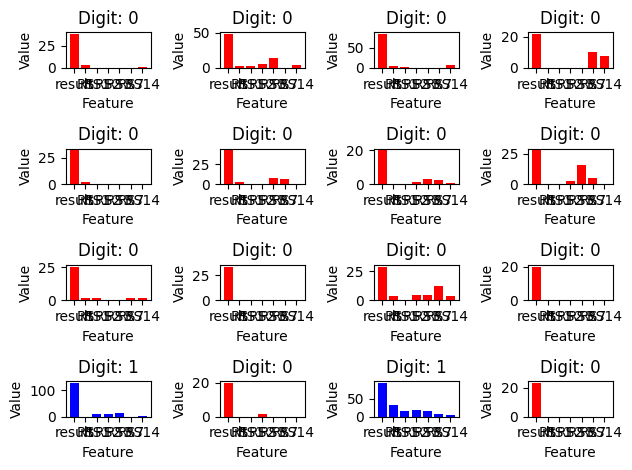

In [ ]:
for i in range(16):
    if y_train.iloc[i] == 1:
        COLOR = 'blue'
    else:
        COLOR = 'red'
    plt.subplot(4, 4, i+1)
    plt.bar(range(len(features)), X_train.iloc[i], color=COLOR)
    plt.xticks(range(len(features)), features)
    plt.title(f'Digit: {y_train.iloc[i]}')
    plt.xlabel('Feature')
    plt.ylabel('Value')
plt.tight_layout()
plt.show()

In [ ]:
os.environ['DWAVE_API_TOKEN'] = 'DEV-f60c65fe44560f13f47598ad3292532f987466f5'

In [ ]:
# start training the model
clfs = train_model(X_train, y_train, X_test, y_test, 1.0)


Train size: 3932, Test size: 983
Num weak classifiers: 30

Adaboost
accu (train):  0.99
accu (test):  0.97

Decision tree
accu (train):  0.97
accu (test):  0.96

Random Forest
accu (train):  0.94
accu (test):  0.94

QBoost
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
accu (train):  0.03
accu (test):  0.02

QBoostPlus
[0 0 0 0]
accu (train):  0.94
accu (test):  0.94
Method 	 Adaboost 	 DecisionTree 	 RandomForest 	 Qboost 	 Qboost+
Train	  0.99 		  0.97 		  0.94 		  0.03 		  0.94
Test	  0.97 		  0.96 		  0.94 		  0.02 		  0.94


In [ ]:
# TODO: for this cell, Graphviz executables must be on systems PATH
# You can optionally visualize the decision trees by uncommenting the following code
import graphviz
from sklearn import tree
clf = clfs[0]
graph = graphviz.Source(tree.export_graphviz(clf.estimators_[0], out_file=None))
graph.render(None, view=True)

'Source.gv.pdf'

# **Quantum AutoReg Model. Model-B Quantum Neural Network for Time Series Function Fitting - flood forecasting**

In [ ]:
# pip install --upgrade numpy==1.23.5

In [ ]:
# pip install pennylane-sf

In [ ]:
# Import PennyLane, the wrapped version of NumPy provided by PennyLane,and an optimizer.
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import AdamOptimizer

In [ ]:
# Other imports:
# matplotlib.pyplot to plot and visualize the data
# numpy to generate the mathematical function
# pylab to help with interactive plots
# pickle to dump the data into a file for future use
import matplotlib.pyplot as plt
import numpy as np
import pylab
import pickle

In [ ]:
from dateutil.parser import parse
import matplotlib as mpl
import seaborn as sns
import pandas as pd

Time Series River and Weather Data

In [ ]:
# Merge River Data with Weather Data based on date
merged_data_6 = pd.merge(river_data, weather_data_wuppertal, left_on='phenomenon_time', right_on='MESS_DATUM', how='inner')
merged_data_6.drop(['STATIONS_ID', 'MESS_DATUM', 'STATIONS_NAME', 'LATITUDE', 'LONGITUDE', 'result',
                    'phenomenon_time'], axis=1, inplace=True)
print(merged_data_6.head())

   is_flood    RS        RS1        RS2        RS3        RS7      RS14  RSF
0         0   7.0   4.783386   4.692301   0.414096  19.679819  0.000000  6.0
1         0   2.6   2.683403   2.924514  15.361565  12.191592  7.777729  6.0
2         0  72.1  29.716139  21.262006  14.818432   0.000000  0.000000  6.0
3         1  20.6  14.641566  15.462521  17.343773   0.000000  0.000000  6.0
4         1  14.1  13.751461  22.371289   0.575374   1.612096  1.010557  6.0


`We need the precipitation data and whether that indicates flood or not. We need to take the features accordingly.`

In [ ]:
# Define features and target
features = ['RS', 'RS1', 'RS2', 'RS3', 'RS7', 'RS14', 'RSF'] # Feature selection
target = 'is_flood' # Target selection

In [ ]:
# Rescale the data
X = (merged_data_6[features].index-100)/50
Y = merged_data_6[target]/15 - 1

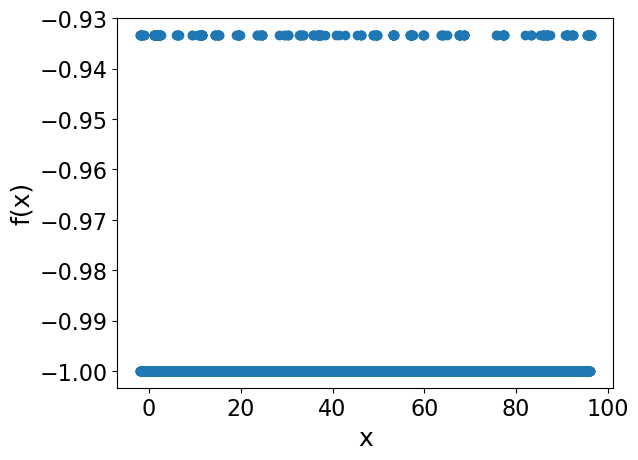

In [ ]:
plt.figure()
plt.scatter(X, Y)
plt.xlabel("x", fontsize=18)
plt.ylabel("f(x)", fontsize=18)
plt.tick_params(axis="both", which="major", labelsize=16)
plt.tick_params(axis="both", which="minor", labelsize=16)
plt.show()

In [ ]:
dev = qml.device("strawberryfields.fock", wires=1, cutoff_dim=10)

Quantum node

For a single quantum mode, each layer of the variational circuit is defined as:

In [ ]:
def layer(v):
    # Matrix multiplication of input layer
    qml.Rotation(v[0], wires=0)
    qml.Squeezing(v[1], 0.0, wires=0)
    qml.Rotation(v[2], wires=0)

    # Bias
    qml.Displacement(v[3], 0.0, wires=0)

    # Element-wise nonlinear transformation
    qml.Kerr(v[4], wires=0)

The variational circuit in the quantum node first encodes the input into the displacement of the mode, and then executes the layers. The output is the expectation of the x-quadrature.

In [ ]:
@qml.qnode(dev)
def quantum_neural_net(var, x=None):
    # Encode input x into quantum state
    qml.Displacement(x, 0.0, wires=0)

    # "layer" subcircuits
    for v in var:
        layer(v)

    return qml.expval(qml.X(0))

Objective

As an objective we take the square loss between target labels and model predictions.

In [ ]:
def square_loss(labels, predictions):
    loss = 0
    for l, p in zip(labels, predictions):
        loss = loss + (l - p) ** 2

    loss = loss / len(labels)
    return loss

In the cost function, we compute the outputs from the variational circuit. Function fitting is a regression problem, and we interpret the expectations from the quantum node as predictions (i.e., without applying postprocessing such as thresholding).

In [ ]:
def cost(var, features, labels):
    preds = [quantum_neural_net(var, x=x) for x in features]
    return square_loss(labels, preds)

The network’s weights (called `var` here) are initialized with values sampled from a normal distribution. We use 6 layers.

In [ ]:
np.random.seed(0)
num_layers = 6
var_init = 0.05 * np.random.randn(num_layers, 5)
print(var_init)

[[ 0.08820262  0.02000786  0.0489369   0.11204466  0.0933779 ]
 [-0.04886389  0.04750442 -0.00756786 -0.00516094  0.02052993]
 [ 0.00720218  0.07271368  0.03805189  0.00608375  0.02219316]
 [ 0.01668372  0.07470395 -0.01025791  0.01565339 -0.04270479]
 [-0.12764949  0.03268093  0.04322181 -0.03710825  0.11348773]
 [-0.07271828  0.00228793 -0.00935919  0.07663896  0.07346794]]


In [ ]:
opt = AdamOptimizer(0.01, beta1=0.9, beta2=0.999)

var = var_init
for it in range(1000): # 1000
    var = opt.step(lambda v: cost(v, X, Y), var)
    print("Iter: {:5d} | Cost: {:0.7f} ".format(it + 1, cost(var, X, Y)))

/home/marek/anaconda3/lib/python3.11/site-packages/pennylane/_grad.py:107: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.


Iter:     1 | Cost: 1.0149489 
Iter:     2 | Cost: 1.0149489 
Iter:     3 | Cost: 1.0149489 
Iter:     4 | Cost: 1.0149489 
Iter:     5 | Cost: 1.0149489 
Iter:     6 | Cost: 1.0149489 
Iter:     7 | Cost: 1.0149489 
Iter:     8 | Cost: 1.0149489 
Iter:     9 | Cost: 1.0149489 
Iter:    10 | Cost: 1.0149489 
Iter:    11 | Cost: 1.0149489 
Iter:    12 | Cost: 1.0149489 
Iter:    13 | Cost: 1.0149489 
Iter:    14 | Cost: 1.0149489 
Iter:    15 | Cost: 1.0149489 
Iter:    16 | Cost: 1.0149489 
Iter:    17 | Cost: 1.0149489 
Iter:    18 | Cost: 1.0149489 
Iter:    19 | Cost: 1.0149489 
Iter:    20 | Cost: 1.0149489 
Iter:    21 | Cost: 1.0149489 
Iter:    22 | Cost: 1.0149489 
Iter:    23 | Cost: 1.0149489 
Iter:    24 | Cost: 1.0149489 
Iter:    25 | Cost: 1.0149489 
Iter:    26 | Cost: 1.0149489 
Iter:    27 | Cost: 1.0149489 
Iter:    28 | Cost: 1.0149489 
Iter:    29 | Cost: 1.0149489 
Iter:    30 | Cost: 1.0149489 
Iter:    31 | Cost: 1.0149489 
Iter:    32 | Cost: 1.0149489 
Iter:   

Finally, we collect the predictions of the trained model for 50 values in the range (-1,1):

In [ ]:
x_pred = np.linspace(-1, 1, 50)
predictions = [quantum_neural_net(var, x=x_) for x_ in x_pred]

and plot the shape of the function that the model has “learned” from the noisy data (red dots).

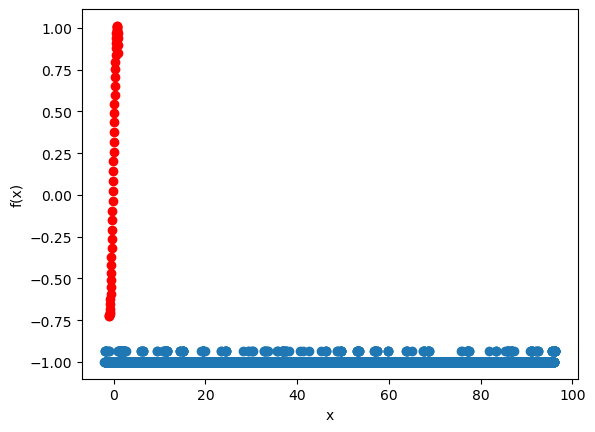

In [ ]:
plt.figure()
plt.scatter(X, Y)
plt.scatter(x_pred, predictions, color="red")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.tick_params(axis="both", which="major")
plt.tick_params(axis="both", which="minor")
plt.show()

Extending the interval predicted by the model shows no drop in accuracy in this model.

In [ ]:
x_pred = np.linspace(-2, 2, 50)
predictions = [quantum_neural_net(var, x=x_) for x_ in x_pred]

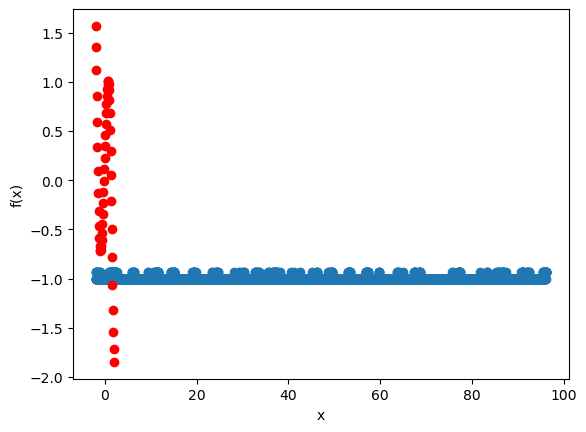

In [ ]:
plt.figure()
plt.scatter(X, Y)
plt.scatter(x_pred, predictions, color="red")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.tick_params(axis="both", which="major")
plt.tick_params(axis="both", which="minor")
plt.show()

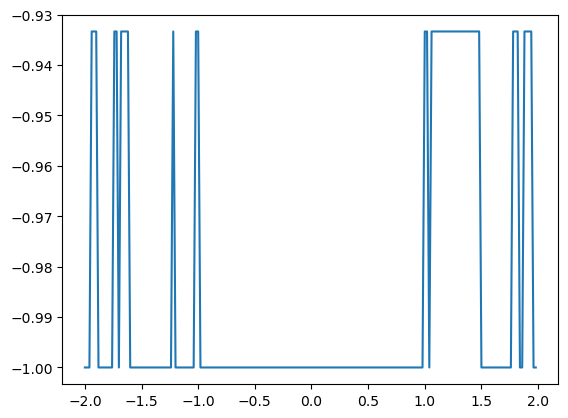

In [ ]:
plt.plot(X[0:200], Y[0:200])

This model is significatly more accurate than the first as cab ne seen by the above plots.

We can use PennyLane to look at typical functions that the model produces without being trained at all. The shape of these functions varies significantly with the variance hyperparameter for the weight initialization.

Setting this hyperparameter to a small value produces almost linear functions, since all quantum gates in the variational circuit approximately perform the identity transformation in that case. Larger values produce smoothly oscillating functions with a period that depends on the number of layers used (generically, the more layers, the smaller the period).

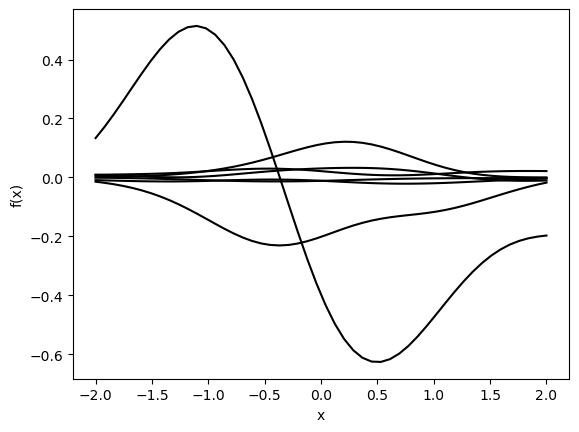

In [ ]:
variance = 1.0

plt.figure()
x_pred = np.linspace(-2, 2, 50)
for i in range(7):
    rnd_var = variance * np.random.randn(num_layers, 7)
    predictions = [quantum_neural_net(rnd_var, x=x_) for x_ in x_pred]
    plt.plot(x_pred, predictions, color="black")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.tick_params(axis="both", which="major")
plt.tick_params(axis="both", which="minor")
plt.show()

# **Quantum Regression algorithm for water level prediction**

In [34]:
# Download all libraries before run notebook
!pip install qiskit
!pip install pylatexenc
!pip install qiskit_machine_learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 66.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=093ab0a760c53c13db663115a54e45d75639c9e4160e863055bc0b856f2497b2
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [35]:
# Necessary imports

import numpy as np
import matplotlib.pyplot as plt

from torch import Tensor
from torch.nn import Linear, CrossEntropyLoss, MSELoss
from torch.optim import SGD

from qiskit import QuantumCircuit
from qiskit_algorithms.utils import algorithm_globals
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
from qiskit_machine_learning.connectors import TorchConnector

# Set seed for random generators
algorithm_globals.random_seed = 42

In [36]:
merged_data_3 = pd.merge(river_data, weather_data_wuppertal, left_on='phenomenon_time', right_on='MESS_DATUM', how='inner')

In [37]:
merged_data_3.drop(['STATIONS_ID', 'MESS_DATUM', 'RSF', 'STATIONS_NAME', 'LATITUDE', 'LONGITUDE', 'phenomenon_time'], axis=1, inplace=True)

In [38]:
# Define features and target variable
features = merged_data_3[['RS', 'RS1', 'RS2', 'RS3', 'RS7', 'RS14']]
target = merged_data_3['result']

1. Classification

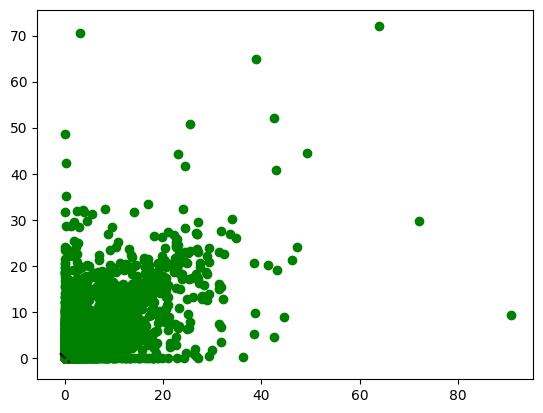

In [39]:
# Convert your river and weather data to numpy arrays
X = features.values
y = target.values

y01 = 1 * (np.sum(X, axis=1) >= 0)  # in { 0,  1}, y01 will be used for SamplerQNN example

# Convert to torch Tensors
X_ = Tensor(X)
y01_ = Tensor(y01).reshape(len(y)).long()
y_ = Tensor(y).reshape(len(y), 1)

# Plot dataset
for x, y_target in zip(X, y):
    if y_target == 1:
        plt.plot(x[0], x[1], "bo")
    else:
        plt.plot(x[0], x[1], "go")
plt.plot([-1, 1], [1, -1], "--", color="black")
plt.show()

A. Classification with PyTorch and EstimatorQNN

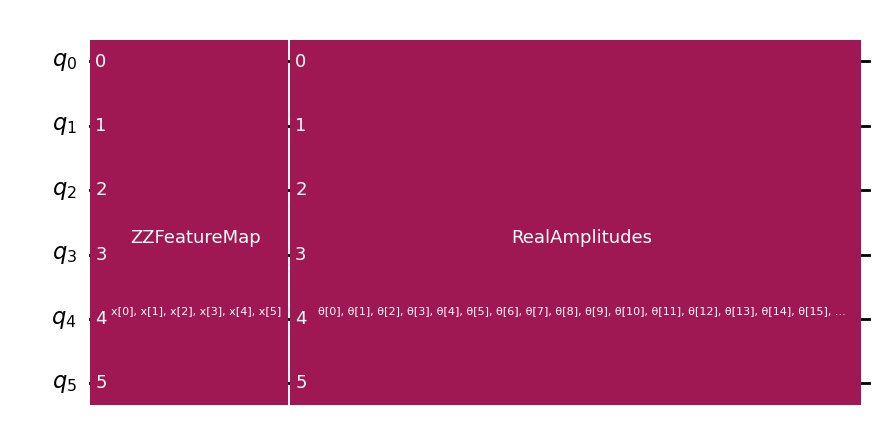

In [40]:
# Assuming X is feature matrix from the river and weather data
num_inputs = X.shape[1]

# Set up a circuit
feature_map = ZZFeatureMap(num_inputs)
ansatz = RealAmplitudes(num_inputs)
qc = QuantumCircuit(num_inputs)
qc.compose(feature_map, inplace=True)
qc.compose(ansatz, inplace=True)
qc.draw("mpl")

In [41]:
# Setup QNN
qnn1 = EstimatorQNN(
    circuit=qc, input_params=feature_map.parameters, weight_params=ansatz.parameters
)

# Set up PyTorch module
# Note: If we don't explicitly declare the initial weights
# they are chosen uniformly at random from [-1, 1].
initial_weights = 5 * (2 * algorithm_globals.random.random(qnn1.num_weights) - 1)
model1 = TorchConnector(qnn1, initial_weights=initial_weights)
print("Initial weights: ", initial_weights)

Initial weights:  [ 2.73956049 -0.6112156   3.5859792   1.97368029 -4.05822652  4.75622352
  2.61139702  2.86064305 -3.71886367 -0.49614062 -1.29201976  4.26764989
  1.4386512   3.22761613 -0.56585801 -2.72761278  0.54584787 -4.36182744
  3.27631172  1.31664399  2.5808774  -1.45474032  4.70698024  3.93121121]


In [42]:
# Test with a single input
model1(X_[0, :])

tensor([-0.0888], grad_fn=<_TorchNNFunctionBackward>)

In [44]:
# Define optimizer and loss
optimizer = SGD(model1.parameters(), lr=10)
f_loss = MSELoss(reduction="sum")

# Start training
model1.train()  # set model to training mode


# Training loop (number of epochs)
num_epochs = 5
for epoch in range(num_epochs):
    # Note from (https://pytorch.org/docs/stable/optim.html):
    # Some optimization algorithms such as LBFGS need to
    # reevaluate the function multiple times, so you have to
    # pass in a closure that allows them to recompute your model.
    # The closure should clear the gradients, compute the loss,
    # and return it.
    def closure():
        optimizer.zero_grad()  # Initialize/clear gradients
        loss = f_loss(model1(X_), y_)  # Evaluate loss function
        loss.backward()  # Backward pass
        print(loss.item())  # Print loss
        return loss

    # Run optimizer step
    optimizer.step(closure)

10523760.0
10522331.0
10516858.0
10521413.0
10527378.0


Accuracy: 0.0


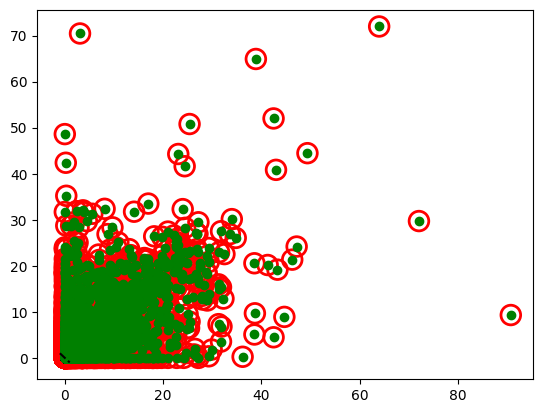

In [43]:
# Evaluate model and compute accuracy
y_predict = []
for x, y_target in zip(X, y):
    output = model1(Tensor(x))
    y_predict += [np.sign(output.detach().numpy())[0]]

print("Accuracy:", sum(y_predict == y) / len(y))

# Plot results
# red == wrongly classified
for x, y_target, y_p in zip(X, y, y_predict):
    if y_target == 1:
        plt.plot(x[0], x[1], "bo")
    else:
        plt.plot(x[0], x[1], "go")
    if y_target != y_p:
        plt.scatter(x[0], x[1], s=200, facecolors="none", edgecolors="r", linewidths=2)
plt.plot([-1, 1], [1, -1], "--", color="black")
plt.show()

Classification with PyTorch and SamplerQNN

In [44]:
# Define feature map and ansatz
feature_map = ZZFeatureMap(num_inputs)
ansatz = RealAmplitudes(num_inputs, entanglement="linear", reps=1)

# Define quantum circuit of num_qubits = input dim
# Append feature map and ansatz
qc = QuantumCircuit(num_inputs)
qc.compose(feature_map, inplace=True)
qc.compose(ansatz, inplace=True)

# Define SamplerQNN and initial setup
parity = lambda x: "{:b}".format(x).count("1") % 2  # optional interpret function
output_shape = 2  # parity = 0, 1
qnn2 = SamplerQNN(
    circuit=qc,
    input_params=feature_map.parameters,
    weight_params=ansatz.parameters,
    interpret=parity,
    output_shape=output_shape,
)

# Set up PyTorch module
# Reminder: If we don't explicitly declare the initial weights
# they are chosen uniformly at random from [-1, 1].
initial_weights = 5 * (2 * algorithm_globals.random.random(qnn2.num_weights) - 1)
print("Initial weights: ", initial_weights)
model2 = TorchConnector(qnn2, initial_weights)

Initial weights:  [ 2.78383497 -3.05361292 -0.33278996 -4.56196234 -3.45710508  1.83048953
  2.44762156  4.67509732 -1.74174642 -1.29540294 -0.30444189 -3.10528641]


In [45]:
# Define model, optimizer, and loss
optimizer = SGD(model2.parameters(), lr=10)
f_loss = CrossEntropyLoss()  # Our output will be in the [0,1] range

# Start training
model2.train()

# Number of epochs
num_epochs = 5

# Training loop
for epoch in range(num_epochs):
    # Define LBFGS closure method (explained in previous section)
    def closure():
        optimizer.zero_grad(set_to_none=True)  # Initialize gradient
        loss = f_loss(model2(X_), y01_)  # Calculate loss
        loss.backward()  # Backward pass

        print(loss.item())  # Print loss
        return loss


    # Run optimizer (LBFGS requires closure)
    optimizer.step(closure);

0.6922058463096619
0.6906059980392456
0.6893194317817688
0.6882582306861877
0.6873791217803955


Accuracy: 0.5788402848423194


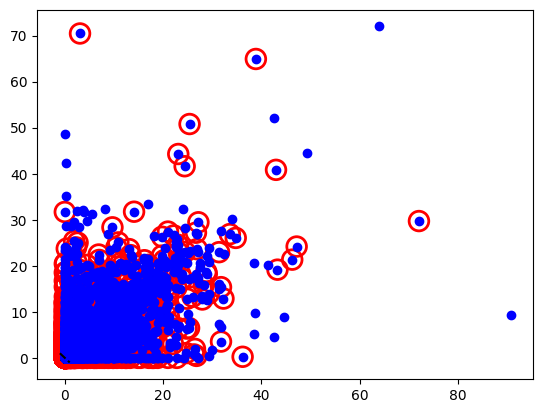

In [46]:
# Evaluate model and compute accuracy
y_predict = []
for x in X:
    output = model2(Tensor(x))
    y_predict += [np.argmax(output.detach().numpy())]

print("Accuracy:", sum(y_predict == y01) / len(y01))

# plot results
# red == wrongly classified
for x, y_target, y_ in zip(X, y01, y_predict):
    if y_target == 1:
        plt.plot(x[0], x[1], "bo")
    else:
        plt.plot(x[0], x[1], "go")
    if y_target != y_:
        plt.scatter(x[0], x[1], s=200, facecolors="none", edgecolors="r", linewidths=2)
plt.plot([-1, 1], [1, -1], "--", color="black")
plt.show()

2. Regression

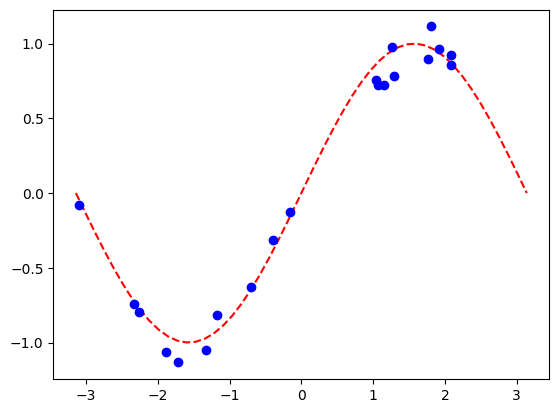

In [47]:
# Generate random dataset

num_samples = 20
eps = 0.2
lb, ub = -np.pi, np.pi
f = lambda x: np.sin(x)

X = (ub - lb) * algorithm_globals.random.random([num_samples, 1]) + lb
y = f(X) + eps * (2 * algorithm_globals.random.random([num_samples, 1]) - 1)
# print(X)
# print()
# print(y)
plt.plot(np.linspace(lb, ub), f(np.linspace(lb, ub)), "r--")
plt.plot(X, y, "bo")
plt.show()

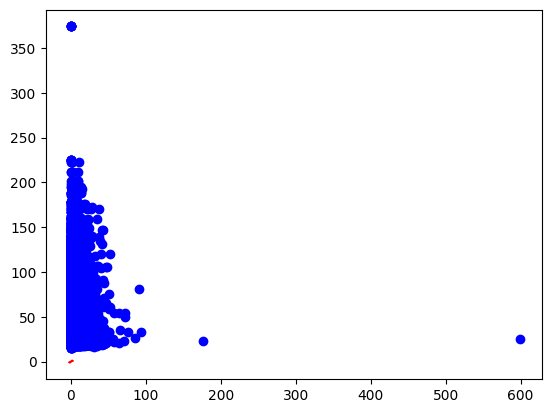

In [48]:
lb, ub = -np.pi, np.pi
f = lambda x: np.sin(x)

# Step 1: Data Preparation
X = merged_data_3[features.columns]  # Use all features for training
y = merged_data_3[target.name]
# print(X)
# print(y)

# Plot the function
plt.plot(np.linspace(lb, ub), f(np.linspace(lb, ub)), "r--")
plt.plot(X, y, "bo")
plt.show()

A. Regression with PyTorch and EstimatorQNN

In [50]:
# Construct simple feature map
param_x = Parameter("x")
feature_map = QuantumCircuit(1, name="fm")
feature_map.ry(param_x, 0)

# Construct simple feature map
param_y = Parameter("y")
ansatz = QuantumCircuit(1, name="vf")
ansatz.ry(param_y, 0)

qc = QuantumCircuit(1)
qc.compose(feature_map, inplace=True)
qc.compose(ansatz, inplace=True)

# Construct QNN
qnn3 = EstimatorQNN(circuit=qc, input_params=[param_x], weight_params=[param_y])

# Set up PyTorch module
# Reminder: If we don't explicitly declare the initial weights
# they are chosen uniformly at random from [-1, 1].
initial_weights = 0.1 * (2 * algorithm_globals.random.random(qnn3.num_weights) - 1)
model3 = TorchConnector(qnn3, initial_weights)

In [51]:
from torch.optim import LBFGS

# Define optimizer and loss function
optimizer = LBFGS(model3.parameters())
f_loss = MSELoss(reduction="sum")

# Start training
model3.train()  # set model to training mode
X = X.values.reshape(-1, 1)  # Reshape X to have a single input dimension

# Define objective function
def closure():
    optimizer.zero_grad(set_to_none=True)  # Initialize gradient
    loss = f_loss(model3(Tensor(X)), Tensor(y))  # Compute batch loss
    loss.backward()  # Backward pass
    print(loss.item())  # Print loss
    return loss


# Run optimizer
optimizer.step(closure)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4915])) that is different to the input size (torch.Size([29490, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


305542627328.0
306648252416.0
305367580672.0
305367121920.0
305367121920.0


tensor(3.0554e+11, grad_fn=<MseLossBackward0>)

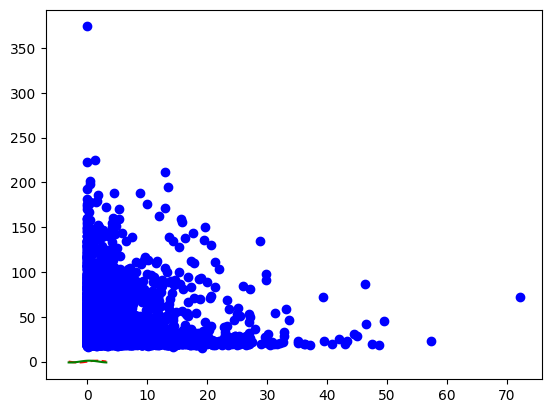

In [52]:
# Plot target function
plt.plot(np.linspace(lb, ub), f(np.linspace(lb, ub)), "r--")

# Subset X to match the size of y
X_subset = X[:len(y)]

# Plot data
plt.plot(X_subset, y, "bo")

# Plot fitted line
y_ = []
for x in np.linspace(lb, ub):
    output = model3(Tensor([x]))
    y_ += [output.detach().numpy()[0]]
plt.plot(np.linspace(lb, ub), y_, "g-")

# # Set limits to zoom in
# plt.xlim(lb, ub)  # Adjust as needed
# plt.ylim(-50, 50)  # Adjust as needed

plt.show()


Part 2: MNIST Classification, Hybrid QNNs

In [53]:
# Additional torch-related imports
import torch
import torch.nn.functional as F
from torch import cat, no_grad, manual_seed
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.optim as optim
from torch.nn import (
    Module,
    Conv2d,
    Linear,
    Dropout2d,
    NLLLoss,
    MaxPool2d,
    Flatten,
    Sequential,
    ReLU,
)

Step 1: Defining Data-loaders for train and test

In [54]:
merged_data_4 = pd.merge(river_data, weather_data_wuppertal, left_on='phenomenon_time', right_on='MESS_DATUM', how='inner')

In [55]:
merged_data_4.drop(['STATIONS_ID', 'MESS_DATUM', 'STATIONS_NAME', 'LATITUDE', 'LONGITUDE', 'phenomenon_time'], axis=1, inplace=True)

In [56]:
# Define features and target
features = ['result', 'RS', 'RS1', 'RS2', 'RS3', 'RS7', 'RS14', 'RSF']
target = 'is_flood'

# Step 1: Data Preparation
X = merged_data_4[features]  # Use all features for training
y = merged_data_4[target]
print(X)
print(y)

      result    RS        RS1        RS2        RS3        RS7      RS14  RSF
0       31.0   7.0   4.783386   4.692301   0.414096  19.679819  0.000000  6.0
1       27.0   2.6   2.683403   2.924514  15.361565  12.191592  7.777729  6.0
2       50.0  72.1  29.716139  21.262006  14.818432   0.000000  0.000000  6.0
3      124.0  20.6  14.641566  15.462521  17.343773   0.000000  0.000000  6.0
4      150.0  14.1  13.751461  22.371289   0.575374   1.612096  1.010557  6.0
...      ...   ...        ...        ...        ...        ...       ...  ...
4910   172.6   2.8   0.000000  13.805612  17.251582  27.545747  8.409038  4.0
4911   160.2   0.3  12.782493   0.592617   1.429676  12.063629  9.029170  4.0
4912   143.7  17.6  10.346342   0.000000   6.685611   0.813981  4.013248  4.0
4913   143.6   0.1   1.598052   5.983179  19.987744   5.539653  1.975216  4.0
4914   137.8   5.0   9.724286  27.137444  25.709806   0.000000  2.429940  4.0

[4915 rows x 8 columns]
0       0
1       0
2       0
3       1

In [57]:
# Train Dataset
# -------------

# Set train shuffle seed (for reproducibility)
manual_seed(42)

batch_size = 1
n_samples = 100  # We will concentrate on the first 100 samples

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Filter out labels (originally 0-9), leaving only labels 0 and 1
idx = np.append(
    np.where(y_train == 0)[0][:n_samples], np.where(y_train == 1)[0][:n_samples]
)
X_train_filtered = X_train.iloc[idx]
y_train_filtered = y_train.iloc[idx]

# Define torch dataloader with filtered data
train_loader = DataLoader(list(zip(X_train_filtered.values, y_train_filtered.values)), batch_size=batch_size, shuffle=True)

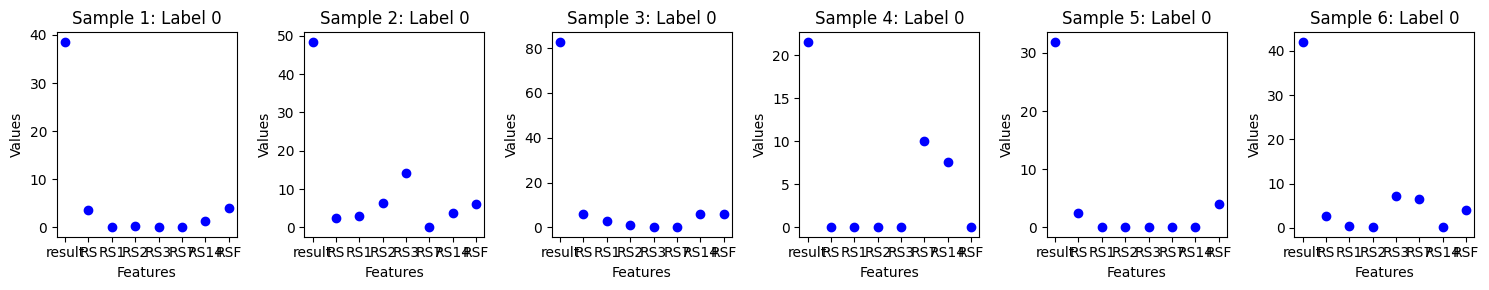

In [58]:
n_samples_show = 6

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=n_samples_show, figsize=(15, 3))

# Iterate through the first few samples in the dataset
for i in range(n_samples_show):
    # Extract features and target for the current sample
    features, target = X_train_filtered.iloc[i], y_train_filtered.iloc[i]

    # Create a scatter plot for the features
    axes[i].scatter(features.index, features.values, c='b', marker='o')

    # Add title and labels
    axes[i].set_title("Sample {}: Label {}".format(i+1, target))
    axes[i].set_xlabel("Features")
    axes[i].set_ylabel("Values")

plt.tight_layout()
plt.show()

In [83]:
# Test Dataset
# -------------

# Set test shuffle seed (for reproducibility)
# manual_seed(5)

batch_size = 1
n_samples = 100  # We will concentrate on the first 100 samples

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Filter out labels, leaving only labels 0 and 1
idx = np.append(
    np.where(y_train == 0)[0][:n_samples], np.where(y_train == 1)[0][:n_samples]
)
X_train_filtered = X_train.iloc[idx]
y_train_filtered = y_train.iloc[idx]

# Define torch dataloader with filtered data
train_loader = DataLoader(list(zip(X_train_filtered.values, y_train_filtered.values)), batch_size=batch_size, shuffle=True)

Step 2: Defining the QNN and Hybrid Model

In [84]:
# Define and create QNN
def create_qnn():
    feature_map = ZZFeatureMap(2)
    ansatz = RealAmplitudes(2, reps=1)
    qc = QuantumCircuit(2)
    qc.compose(feature_map, inplace=True)
    qc.compose(ansatz, inplace=True)

    # REMEMBER TO SET input_gradients=True FOR ENABLING HYBRID GRADIENT BACKPROP
    qnn = EstimatorQNN(
        circuit=qc,
        input_params=feature_map.parameters,
        weight_params=ansatz.parameters,
        input_gradients=True,
    )
    return qnn


qnn4 = create_qnn()

In [85]:
# Define torch NN module


class Net(Module):
    def __init__(self, qnn):
        super().__init__()
        self.conv1 = Conv2d(1, 2, kernel_size=5)
        self.conv2 = Conv2d(2, 16, kernel_size=5)
        self.dropout = Dropout2d()
        self.fc1 = Linear(256, 64)
        self.fc2 = Linear(64, 2)  # 2-dimensional input to QNN
        self.qnn = TorchConnector(qnn)  # Apply torch connector, weights chosen
        # uniformly at random from interval [-1,1].
        self.fc3 = Linear(1, 1)  # 1-dimensional output from QNN

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = self.dropout(x)
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.qnn(x)  # apply QNN
        x = self.fc3(x)
        return cat((x, 1 - x), -1)


model4 = Net(qnn4)

Step 3: Training

In [86]:
import torch.nn as nn
from torch.nn import Conv1d
from torch.optim import Adam

# Define torch NN module
class Net(Module):
    def __init__(self, qnn):
        super().__init__()
        self.conv1 = Conv1d(1, 2, kernel_size=3)  # Adjusted kernel size to 3
        self.dropout = Dropout2d()
        # Calculate the output size after convolution and pooling
        self.output_size_after_conv_pool = self._calculate_output_size_after_conv_pool()
        # Adjusted input size based on the output size after flattening
        self.fc1 = Linear(self.output_size_after_conv_pool, 64)
        # Adjusted input size to match the output size of the previous layer
        self.fc2 = Linear(64, 32)
        self.fc3 = Linear(32, 2)  # 2-dimensional input to QNN
        self.qnn = TorchConnector(qnn)  # Apply torch connector, weights chosen
        # 1-dimensional output from QNN
        self.fc4 = Linear(1, 1)

    def _calculate_output_size_after_conv_pool(self):
        # Assuming the input size is 7 and kernel size is 3 with max pooling of size 2
        input_size = 8 # Adjust size based on length of features
        kernel_size = 3
        stride = 1  # Assuming default stride
        dilation = 1  # Assuming default dilation
        padding = 0  # Assuming default padding
        pool_size = 2
        output_size = ((input_size - kernel_size + 2 * padding) // stride) + 1
        output_size = ((output_size - pool_size) // pool_size) + 1
        return output_size * 2  # Multiply by the number of channels (2)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool1d(x, 2)  # Change max_pool2d to max_pool1d
        x = self.dropout(x)
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.qnn(x)  # apply QNN
        x = self.fc4(x)
        return cat((x, 1 - x), -1)

model4 = Net(qnn4)

In [87]:
# Define model, optimizer, and loss function
optimizer = Adam(model4.parameters(), lr=0.001)
loss_func = NLLLoss()

# Start training
epochs = 10  # Set number of epochs
loss_list = []  # Store loss history
model4.train()  # Set model to training mode

for epoch in range(epochs):
    total_loss = []
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad(set_to_none=True)  # Initialize gradient

        data = data.float()  # Convert the input tensor to the same data type as the bias tensor

        # Ensure correct input shape for 1D convolution
        data = data.view(-1, 1, 8)  # batch_size=1, 1 channel, sequence_length=7

        output = model4(data)  # Forward pass
        loss = loss_func(output, target)  # Calculate loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize weights
        total_loss.append(loss.item())  # Store loss
    loss_list.append(sum(total_loss) / len(total_loss))
    print("Training [{:.0f}%]\tLoss: {:.4f}".format(100.0 * (epoch + 1) / epochs, loss_list[-1]))


Training [10%]	Loss: -0.4579
Training [20%]	Loss: -0.5338
Training [30%]	Loss: -0.5036
Training [40%]	Loss: -0.4901
Training [50%]	Loss: -0.5004
Training [60%]	Loss: -0.5800
Training [70%]	Loss: -0.5672
Training [80%]	Loss: -0.5637
Training [90%]	Loss: -0.4953
Training [100%]	Loss: -0.5244


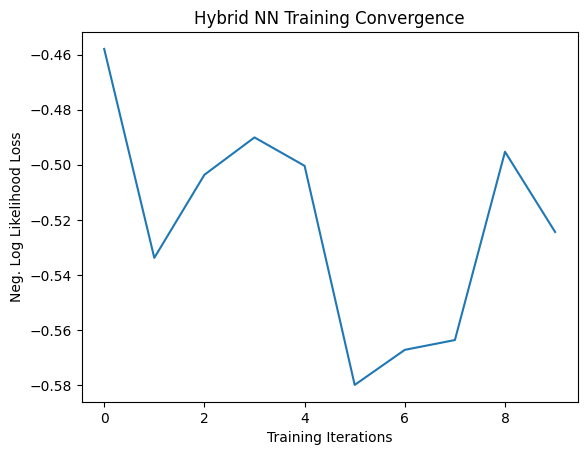

In [88]:
# Plot loss convergence
plt.plot(loss_list)
plt.title("Hybrid NN Training Convergence")
plt.xlabel("Training Iterations")
plt.ylabel("Neg. Log Likelihood Loss")
plt.show()

In [89]:
torch.save(model4.state_dict(), "model4.pt")

Step 4: Evaluation

In [90]:
qnn5 = create_qnn()
model5 = Net(qnn5)
model5.load_state_dict(torch.load("model4.pt"))

<All keys matched successfully>

In [91]:
# Start evaluation
model5.eval()  # set model to evaluation mode
correct = 0
total_loss = []

with torch.no_grad():
    for batch_idx, (data, target) in enumerate(train_loader):
        # Ensure correct input shape for 1D convolution
        data = data.float()  # Convert the input tensor to the same data type as the bias tensor
        data = data.view(-1, 1, 8)  # Assuming the sequence length is 8

        output = model5(data)
        if len(output.shape) == 1:
            output = output.reshape(1, *output.shape)

        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

        loss = loss_func(output, target)
        total_loss.append(loss.item())

    print(
        "Performance on test data:\n\tLoss: {:.4f}\n\tAccuracy: {:.1f}%".format(
            sum(total_loss) / len(total_loss), correct / len(train_loader) / batch_size * 100
        )
    )

Performance on test data:
	Loss: -0.4869
	Accuracy: 49.5%


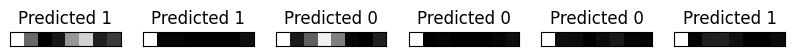

In [92]:
# Plot predicted labels

n_samples_show = 6
count = 0
fig, axes = plt.subplots(nrows=1, ncols=n_samples_show, figsize=(10, 3))

model5.eval()
with torch.no_grad():
    for batch_idx, (data, target) in enumerate(train_loader):
        if count == n_samples_show:
            break

        # Convert data to the appropriate data type
        data = data.float()

        # Ensure correct input shape for linear layer
        data = data.view(-1, 1, 8)  # Assuming the sequence length is 8

        output = model5(data[0:1])
        if len(output.shape) == 1:
            output = output.reshape(1, *output.shape)

        pred = output.argmax(dim=1, keepdim=True)

        # Reshape data for displaying as an image
        img_data = data[0].numpy().squeeze()  # Convert tensor to numpy array and remove singleton dimensions
        img_data = np.expand_dims(img_data, axis=0)  # Add a new axis to make it a 2D array
        axes[count].imshow(img_data, cmap="gray")

        axes[count].set_xticks([])
        axes[count].set_yticks([])
        axes[count].set_title("Predicted {}".format(pred.item()))

        count += 1

plt.show()